In [1]:
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({'font.size':12})



#Preprocesing
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
#Features selection
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectFromModel


In [2]:
df = pd.read_csv('data.csv', sep=',', index_col='id', encoding='utf-8')
df.shape #Return a tuple representing the dimensionality of the DataFrame

(569, 32)

In [3]:
df.sample(5) #Return a random (n) samples of items

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
923780           B        11.13         22.44           71.49      378.4   
8910251          B        10.60         18.95           69.28      346.4   
8912280          M        16.24         18.77          108.80      805.1   
89263202         M        20.09         23.86          134.70     1247.0   
84667401         M        13.73         22.61           93.60      578.3   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
923780            0.09566           0.08194         0.04824   
8910251           0.09688           0.11470         0.06387   
8912280           0.10660           0.18020         0.19480   
89263202          0.10800           0.18380         0.22830   
84667401          0.11310           0.22930         0.21280   

          concave points_mean  symmetry_mean  ...  texture_worst  \
id                                            ...                  
923780                0.02257         0.2030  ...          28.26   
8910251               0.02642         0.1922  ...          22.94   
8912280               0.09052         0.1876  ...          25.09   
89263202              0.12800         0.2249  ...          29.43   
84667401              0.08025         0.2069  ...          32.01   

          perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
id                                                                           
923780              77.80       436.6            0.1087             0.1782   
8910251             78.28       424.8            0.1213             0.2515   
8912280            126.90      1031.0            0.1365             0.4706   
89263202           158.80      1696.0            0.1347             0.3391   
84667401           108.80       697.7            0.1651             0.7725   

          concavity_worst  concave points_worst  symmetry_worst  \
id                                                                
923780             0.1564               0.06413          0.3169   
8910251            0.1916               0.07926          0.2940   
8912280            0.5026               0.17320          0.2770   
89263202           0.4932               0.19230          0.3294   
84667401           0.6943               0.22080          0.3596   

          fractal_dimension_worst  Unnamed: 32  
id                                              
923780                    0.08032          NaN  
8910251                   0.07587          NaN  
8912280                   0.10630          NaN  
89263202                  0.09469          NaN  
84667401                  0.14310          NaN  

[5 rows x 32 columns]

In [4]:
df.head() #Return the first n row (default n=5)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave points_mean  symmetry_mean  ...  texture_worst  \
id                                            ...                  
842302                0.14710         0.2419  ...          17.33   
842517                0.07017         0.1812  ...          23.41   
84300903              0.12790         0.2069  ...          25.53   
84348301              0.10520         0.2597  ...          26.50   
84358402              0.10430         0.1809  ...          16.67   

          perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
id                                                                           
842302             184.60      2019.0            0.1622             0.6656   
842517             158.80      1956.0            0.1238             0.1866   
84300903           152.50      1709.0            0.1444             0.4245   
84348301            98.87       567.7            0.2098             0.8663   
84358402           152.20      1575.0            0.1374             0.2050   

          concavity_worst  concave points_worst  symmetry_worst  \
id                                                                
842302             0.7119                0.2654          0.4601   
842517             0.2416                0.1860          0.2750   
84300903           0.4504                0.2430          0.3613   
84348301           0.6869                0.2575          0.6638   
84358402           0.4000                0.1625          0.2364   

          fractal_dimension_worst  Unnamed: 32  
id                                              
842302                    0.11890          NaN  
842517                    0.08902          NaN  
84300903                  0.08758          NaN  
84348301                  0.17300          NaN  
84358402                  0.07678          NaN  

[5 rows x 32 columns]

In [5]:
df.tail() #Return the last n row (default n=5)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                       
926424         M        21.56         22.39          142.00     1479.0   
926682         M        20.13         28.25          131.20     1261.0   
926954         M        16.60         28.08          108.30      858.1   
927241         M        20.60         29.33          140.10     1265.0   
92751          B         7.76         24.54           47.92      181.0   

        smoothness_mean  compactness_mean  concavity_mean  \
id                                                          
926424          0.11100           0.11590         0.24390   
926682          0.09780           0.10340         0.14400   
926954          0.08455           0.10230         0.09251   
927241          0.11780           0.27700         0.35140   
92751           0.05263           0.04362         0.00000   

        concave points_mean  symmetry_mean  ...  texture_worst  \
id                                          ...                  
926424              0.13890         0.1726  ...          26.40   
926682              0.09791         0.1752  ...          38.25   
926954              0.05302         0.1590  ...          34.12   
927241              0.15200         0.2397  ...          39.42   
92751               0.00000         0.1587  ...          30.37   

        perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
id                                                                         
926424           166.10      2027.0           0.14100            0.21130   
926682           155.00      1731.0           0.11660            0.19220   
926954           126.70      1124.0           0.11390            0.30940   
927241           184.60      1821.0           0.16500            0.86810   
92751             59.16       268.6           0.08996            0.06444   

        concavity_worst  concave points_worst  symmetry_worst  \
id                                                              
926424           0.4107                0.2216          0.2060   
926682           0.3215                0.1628          0.2572   
926954           0.3403                0.1418          0.2218   
927241           0.9387                0.2650          0.4087   
92751            0.0000                0.0000          0.2871   

        fractal_dimension_worst  Unnamed: 32  
id                                            
926424                  0.07115          NaN  
926682                  0.06637          NaN  
926954                  0.07820          NaN  
927241                  0.12400          NaN  
92751                   0.07039          NaN  

[5 rows x 32 columns]

In [6]:
df.duplicated().sum() #Check if there are duplicates rows

0

In [7]:
pd.DataFrame(df.isnull().sum()).T #Check number of missing value for each column

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          0            0             0               0          0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0                0                 0               0                    0   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0              0  ...              0                0           0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0                 0                  0                0                     0   

   symmetry_worst  fractal_dimension_worst  Unnamed: 32  
0               0                        0          569  

[1 rows x 32 columns]

In [8]:
pd.DataFrame(round(df.isnull().sum() * 100 / len(df),1)).T   #Check percent of missing values for each column

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0        0.0          0.0           0.0             0.0        0.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0              0.0               0.0             0.0                  0.0   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0            0.0  ...            0.0              0.0         0.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0               0.0                0.0              0.0                   0.0   

   symmetry_worst  fractal_dimension_worst  Unnamed: 32  
0             0.0                      0.0        100.0  

[1 rows x 32 columns]

In [9]:
df.info() #Prints information about a DataFrame including the index dtype and columns, non-null values and memory usage

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [10]:
df = df.reset_index(drop=True) #Drop index beacuse we don't need id of patients

In [11]:
df = df.drop(columns="Unnamed: 32") #Drop column wich has only Nan's

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

## Attribute Information:

**1) ID number**

**2) Diagnosis (M = malignant, B = benign)**

**3-32)**


Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

# Visualization

In [16]:
numerical_cols = [cname for cname in df.columns if df[cname].dtype in ['int8', 'int32', 'int64', 'float64']]
#Get list of numerical columns names
print(numerical_cols)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [17]:
categorical_cols = [cname for cname in df.columns if df[cname].dtype == "object"]
#Get list of categorical columns names
print(categorical_cols)

['diagnosis']


In [18]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [19]:
df.loc[df.diagnosis == "M", 'diagnosis'] = "malignat"
df.loc[df.diagnosis == "B", 'diagnosis'] = "benign"

In [20]:
df.diagnosis.value_counts()

benign      357
malignat    212
Name: diagnosis, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

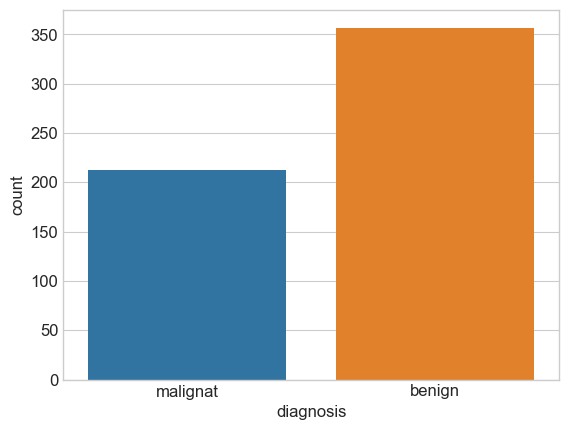

In [23]:
sns.countplot(df, x='diagnosis')

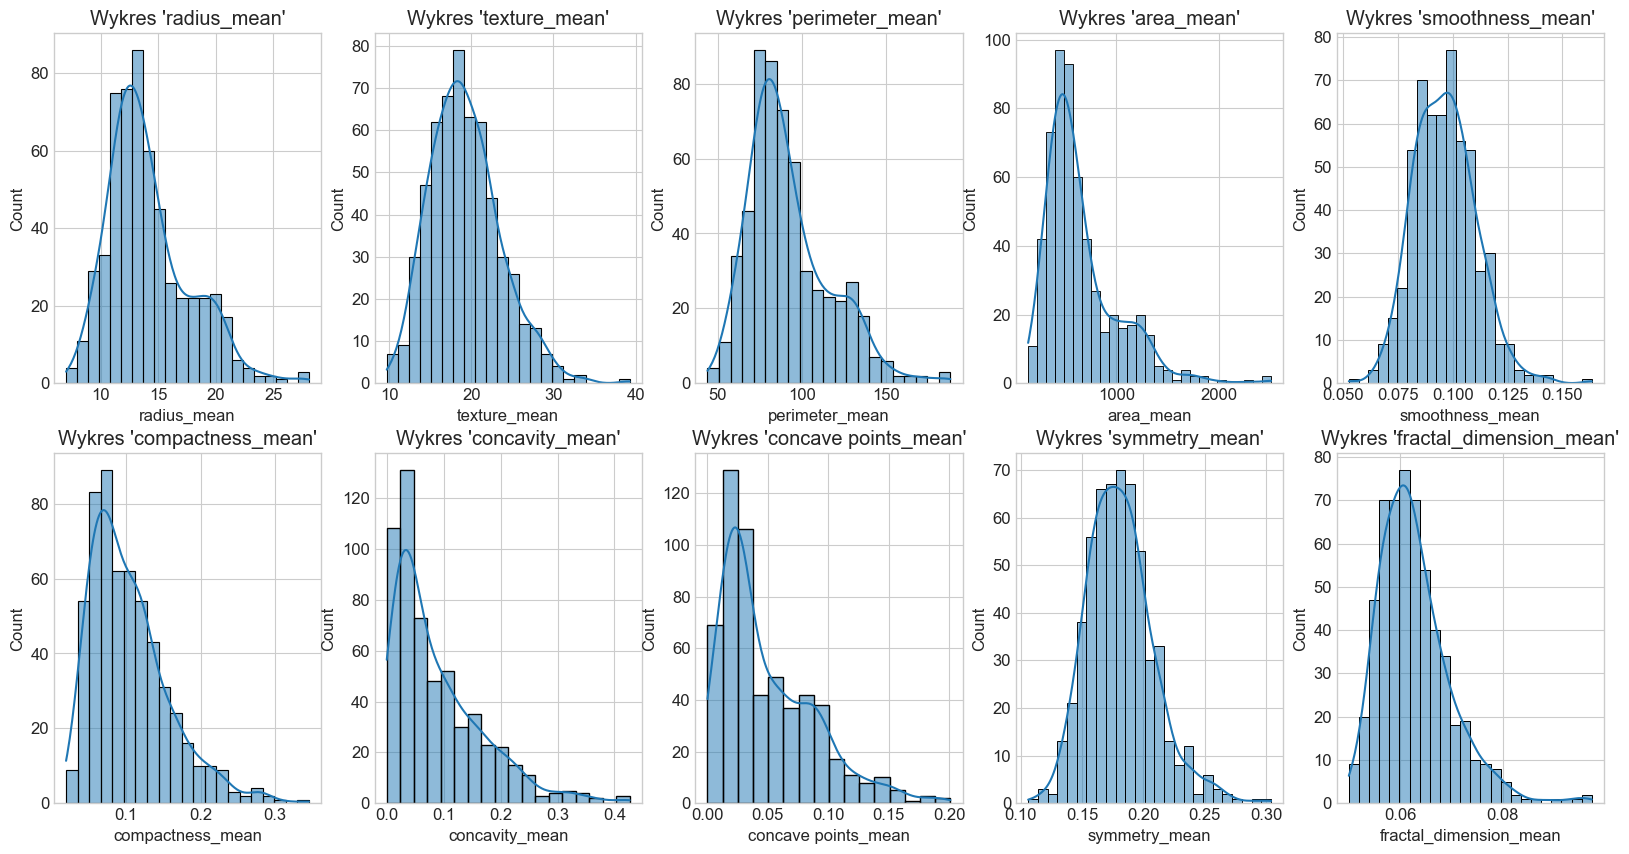

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
n=0
for i in range(2):
    for j in range(5):
        # Creating subplot
        sns.histplot(data=df, x=numerical_cols[n],  kde=True, ax=axes[i, j])
        axes[i, j].set_title(f"Wykres '{numerical_cols[n]}'")
        n=n+1

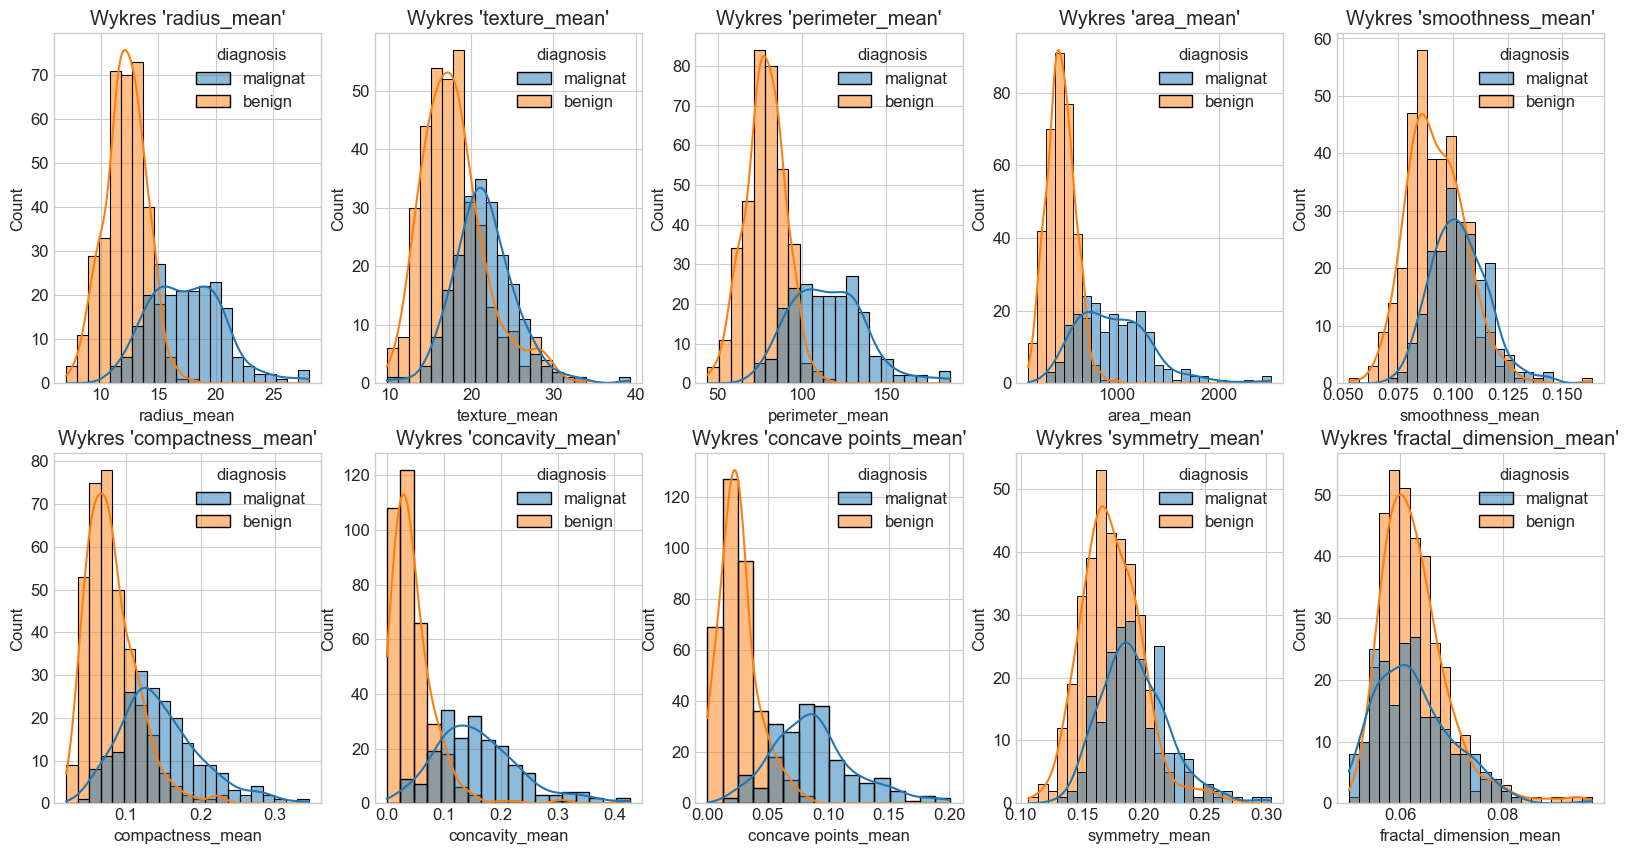

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
n=0
for i in range(2):
    for j in range(5):
        sns.histplot(data=df, x=numerical_cols[n],  kde=True, hue="diagnosis", ax=axes[i, j])
        axes[i, j].set_title(f"Wykres '{numerical_cols[n]}'")
        n=n+1

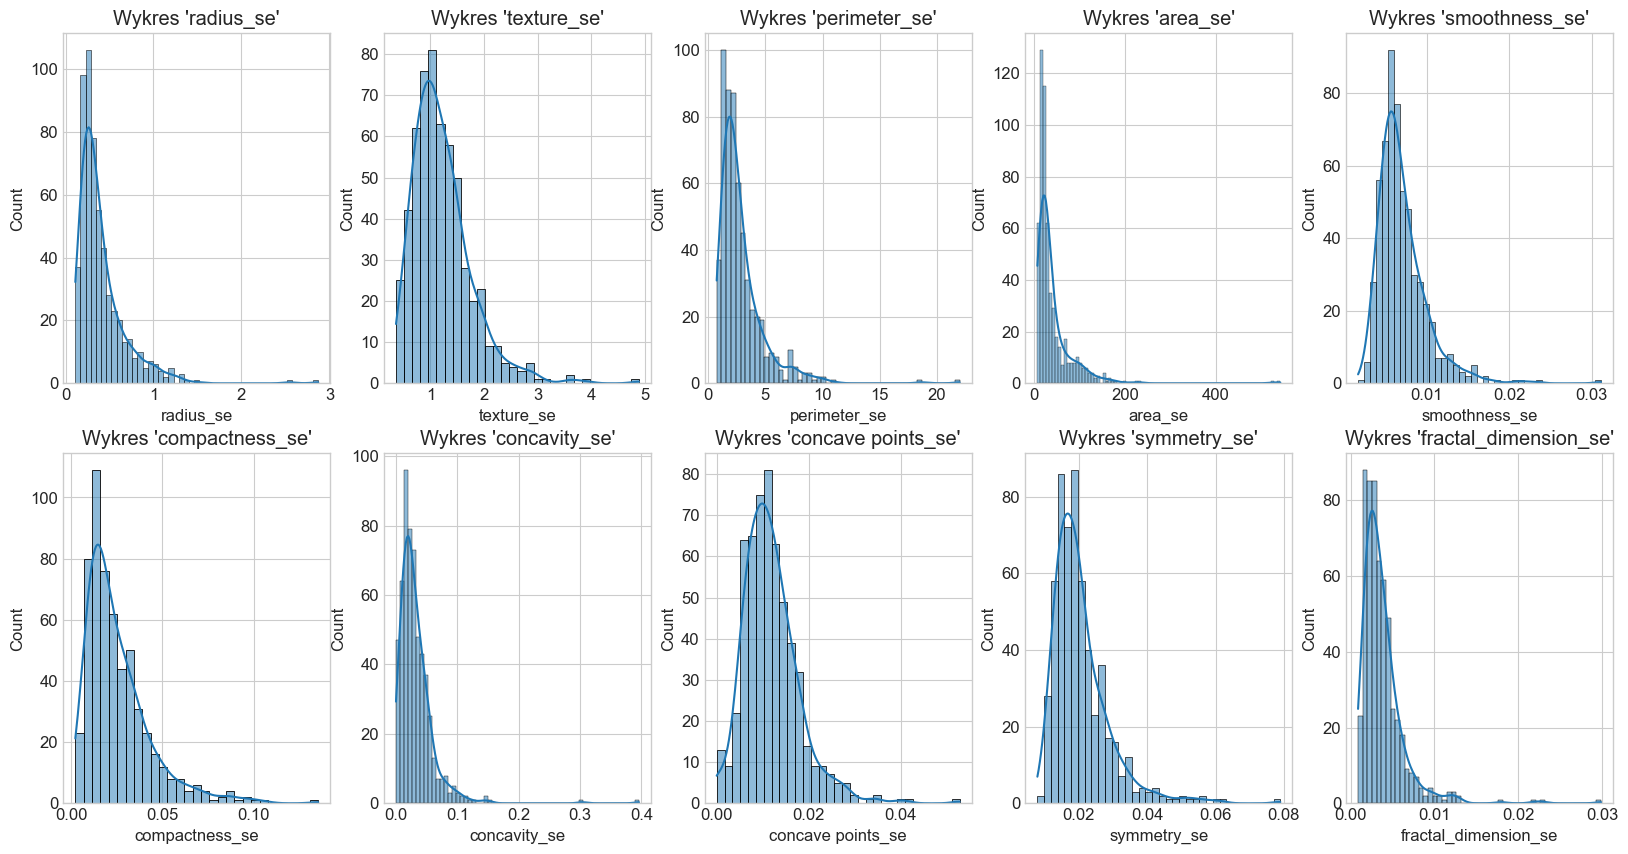

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
n=10
for i in range(2):
    for j in range(5):
        sns.histplot(data=df, x=numerical_cols[n],  kde=True, ax=axes[i, j])
        axes[i, j].set_title(f"Wykres '{numerical_cols[n]}'")
        n=n+1

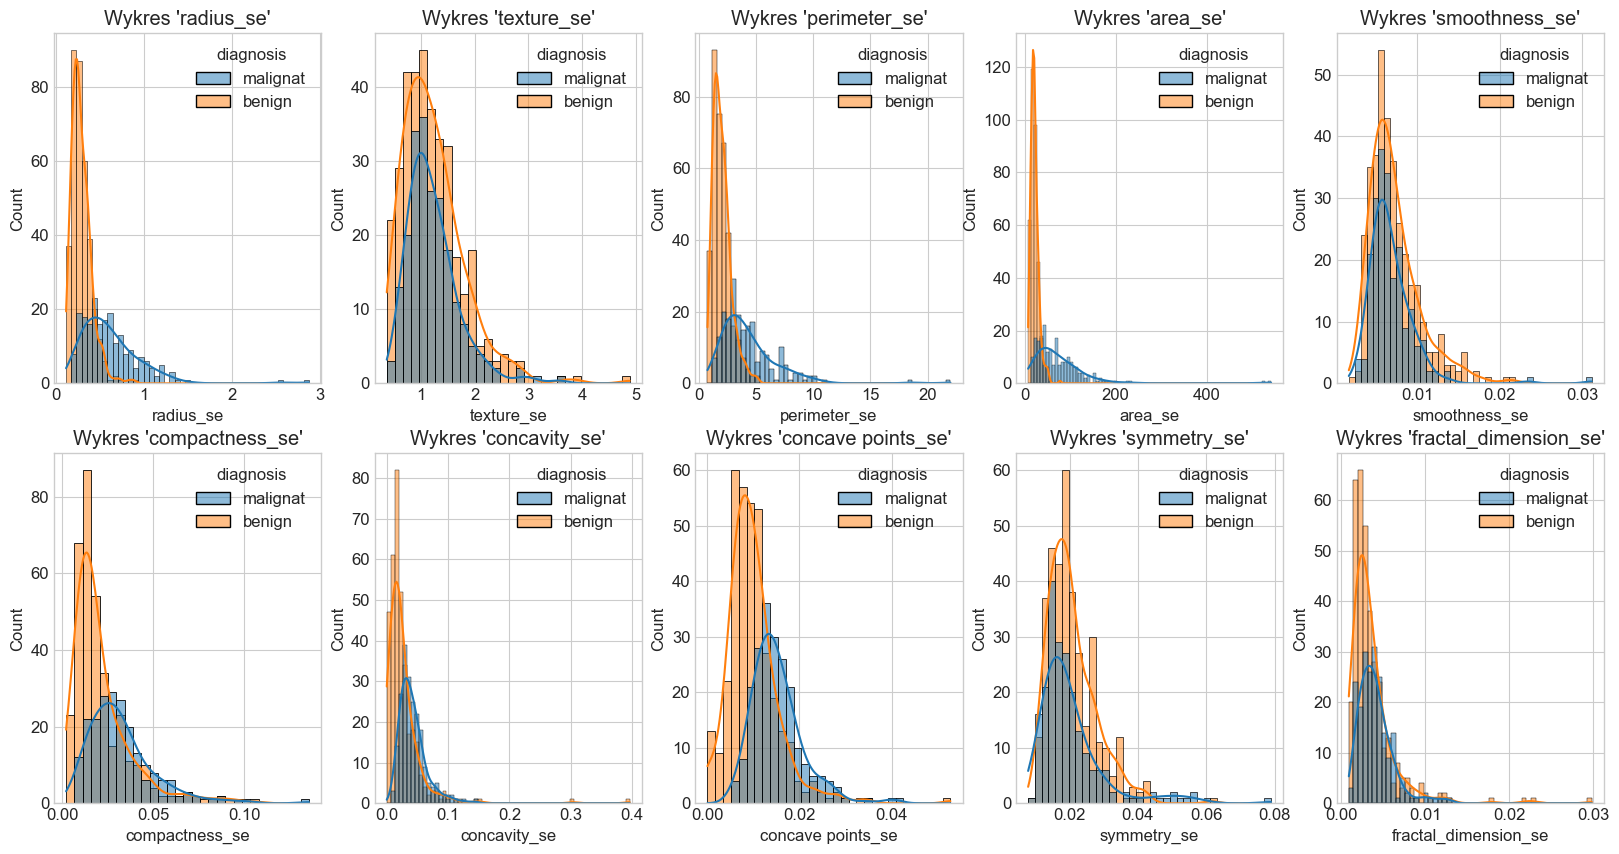

In [42]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
n=10
for i in range(2):
    for j in range(5):
        sns.histplot(data=df, x=numerical_cols[n],  kde=True, hue="diagnosis", ax=axes[i, j])
        axes[i, j].set_title(f"Wykres '{numerical_cols[n]}'")
        n=n+1

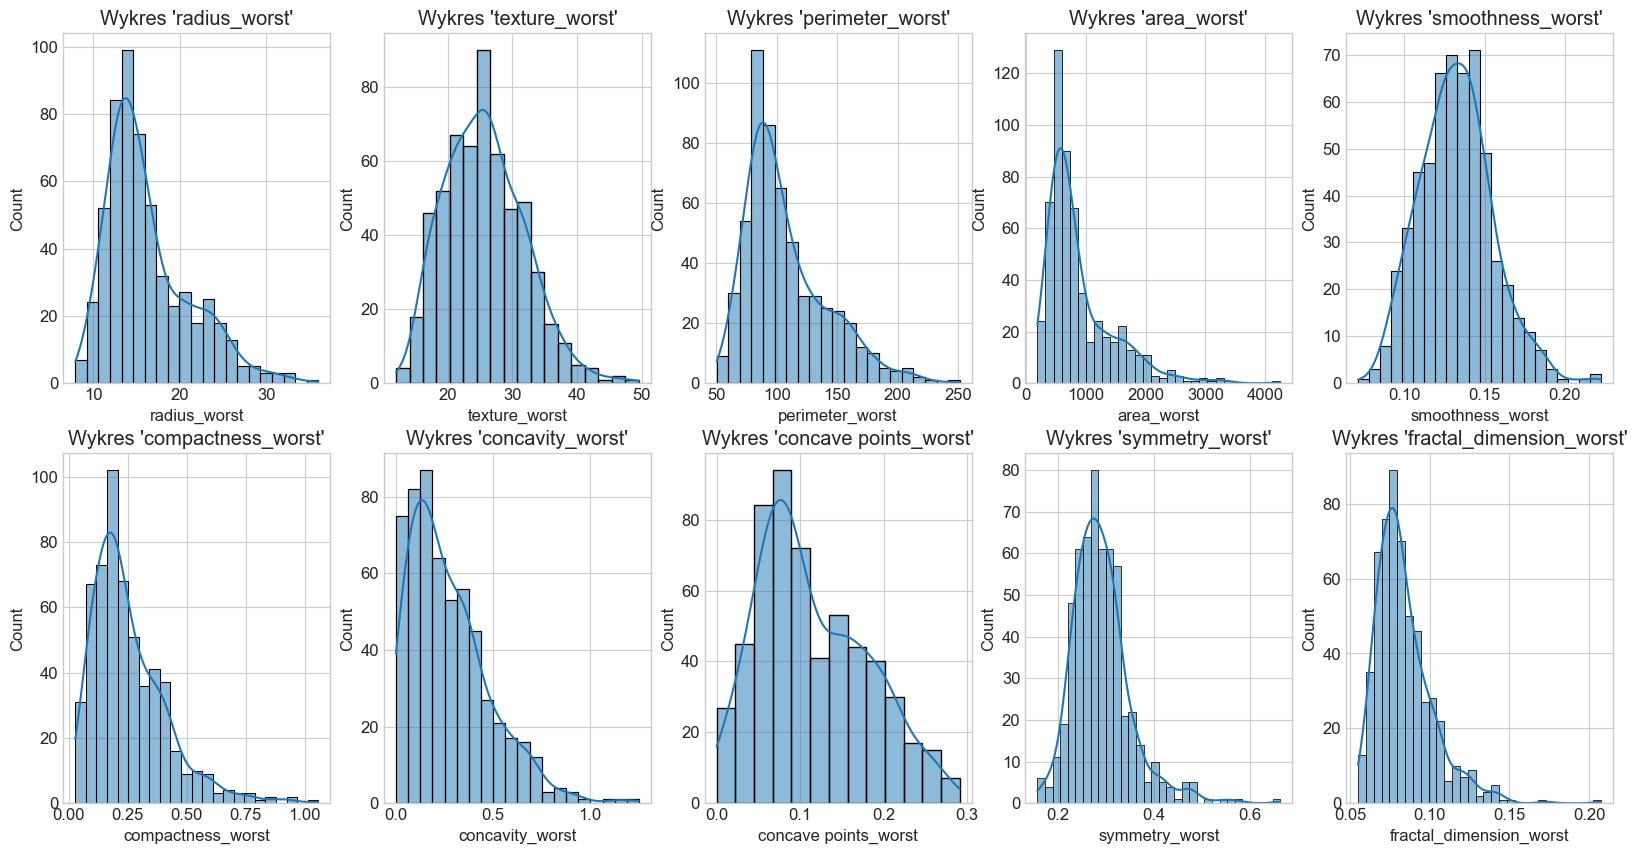

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
n=20
for i in range(2):
    for j in range(5):
        sns.histplot(data=df, x=numerical_cols[n],  kde=True, ax=axes[i, j])
        axes[i, j].set_title(f"Wykres '{numerical_cols[n]}'")
        n=n+1

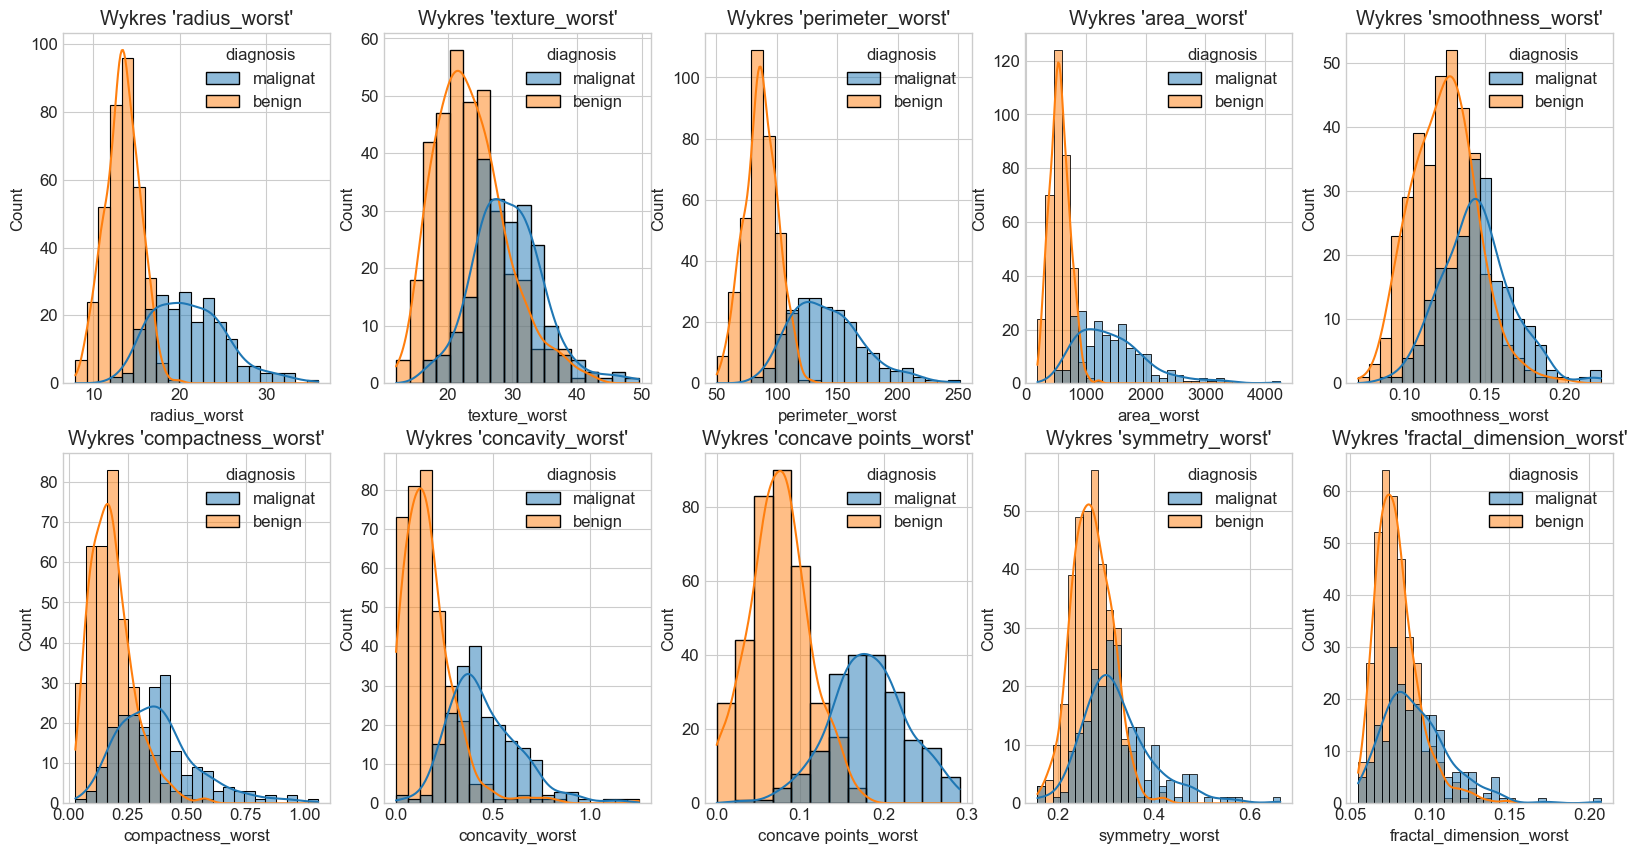

In [44]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
n=20
for i in range(2):
    for j in range(5):
        sns.histplot(data=df, x=numerical_cols[n],  kde=True, hue="diagnosis", ax=axes[i, j])
        axes[i, j].set_title(f"Wykres '{numerical_cols[n]}'")
        n=n+1

<Axes: >

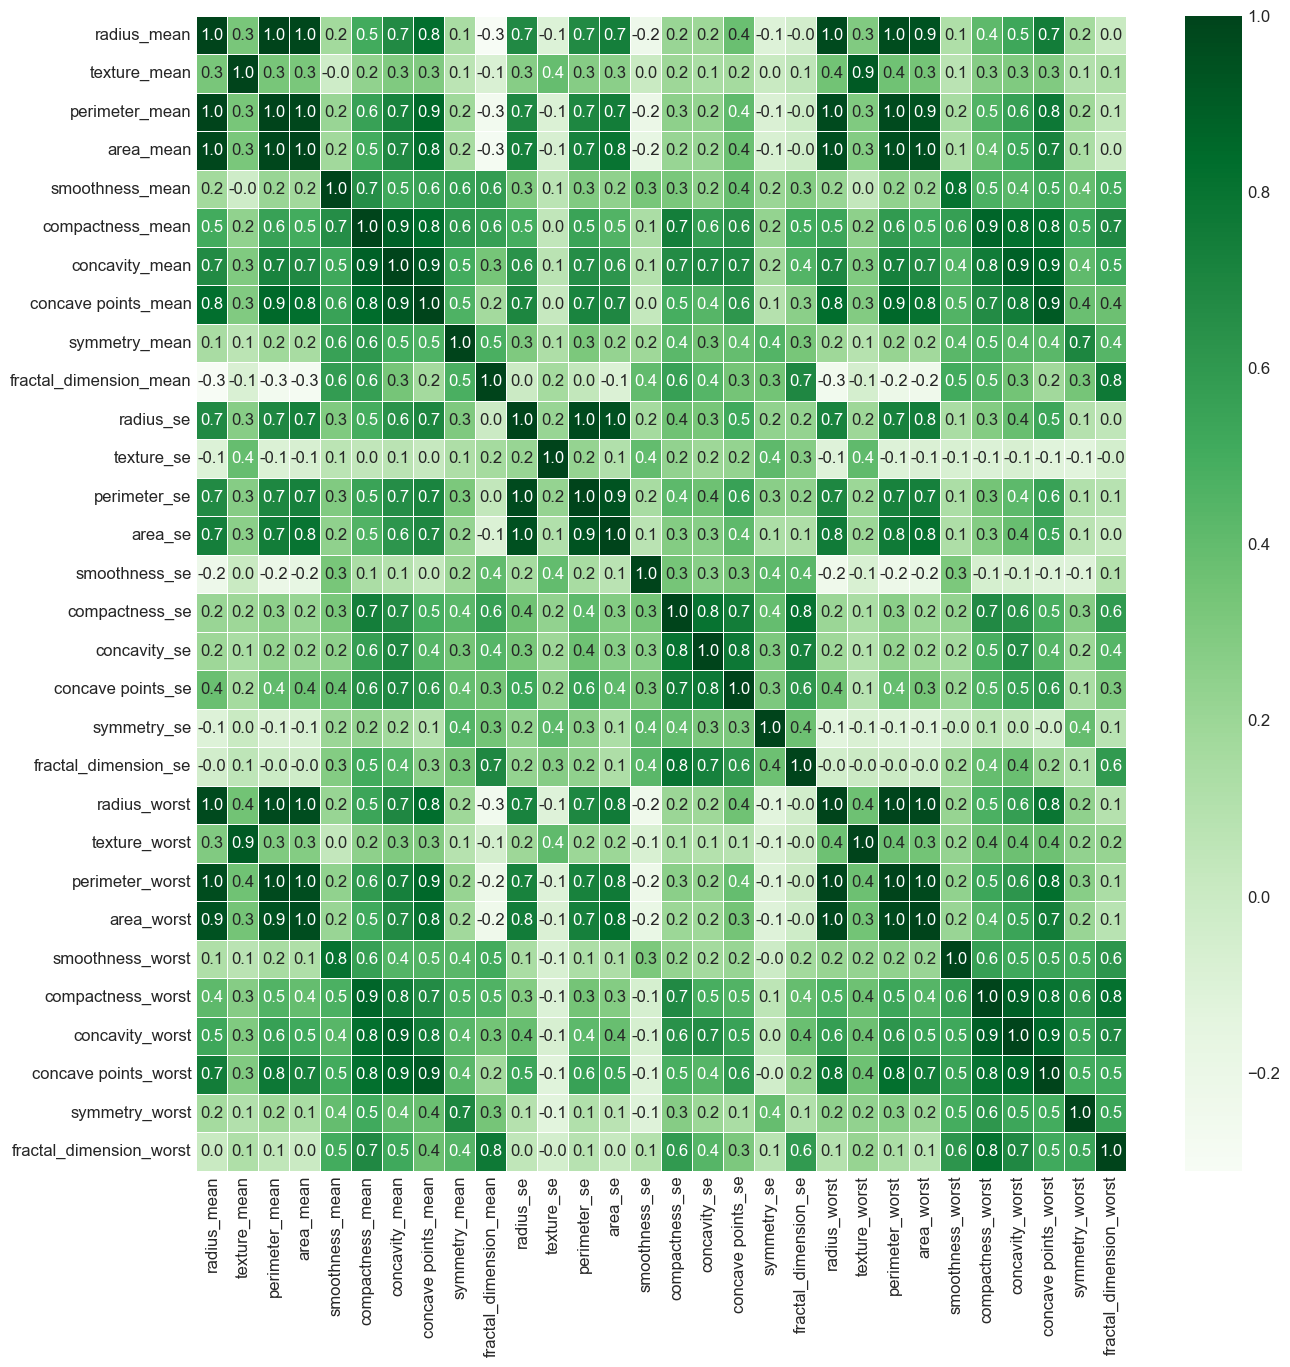

In [53]:
corr = df[numerical_cols].corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap="Greens", annot=True, fmt=".1f", linewidth=.5)

In [22]:
# for cname in numerical_cols[:10]:
#     sns.displot(data=df, x=cname,  kde=True)

In [23]:
# for cname in numerical_cols[:10]:
#     sns.displot(df, x=cname, hue="diagnosis",  kind="kde", fill=True)

In [29]:
#Standarization for plotting violin, swarn, box plots
df_std = preprocessing.StandardScaler().fit_transform(df[numerical_cols])

In [30]:
df_std = pd.DataFrame(df_std, columns =  df[numerical_cols].columns)
df_std.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                2.255747  ...      1.886690      -1.359293         2.303601   
1               -0.868652  ...      1.805927      -0.369203         1.535126   
2               -0.398008  ...      1.511870      -0.023974         1.347475   
3                4.910919  ...     -0.281464       0.133984        -0.249939   
4               -0.562450  ...      1.298575      -1.466770         1.338539   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0    2.001237          1.307686           2.616665         2.109526   
1    1.890489         -0.375612          -0.430444        -0.146749   
2    1.456285          0.527407           1.082932         0.854974   
3   -0.550021          3.394275           3.893397         1.989588   
4    1.220724          0.220556          -0.313395         0.613179   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0              2.296076        2.750622                 1.937015  
1              1.087084       -0.243890                 0.281190  
2              1.955000        1.152255                 0.201391  
3              2.175786        6.046041                 4.935010  
4              0.729259       -0.868353                -0.397100  

[5 rows x 30 columns]

## numerical_cols[:10]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

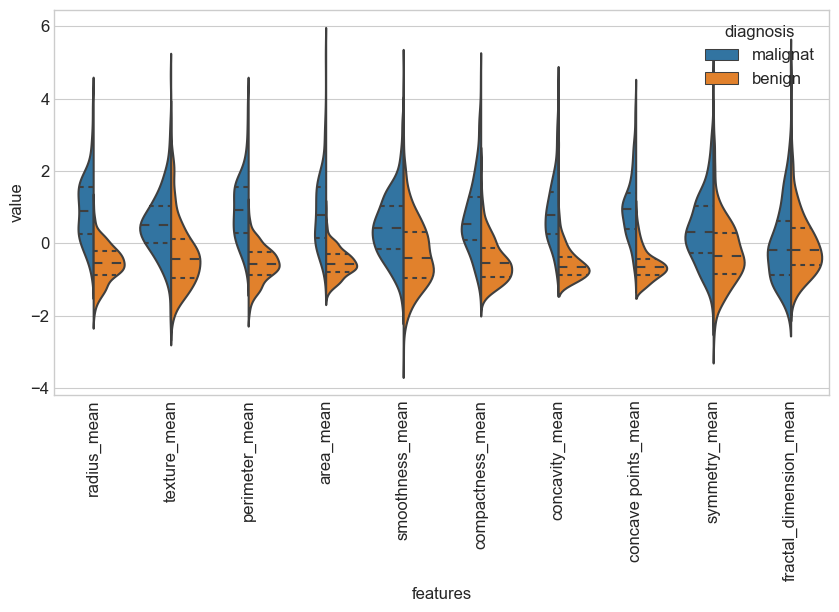

In [31]:
data = pd.concat([df['diagnosis'],df_std.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                     var_name="features",
                     value_name='value')
plt.figure(figsize=(10,5))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

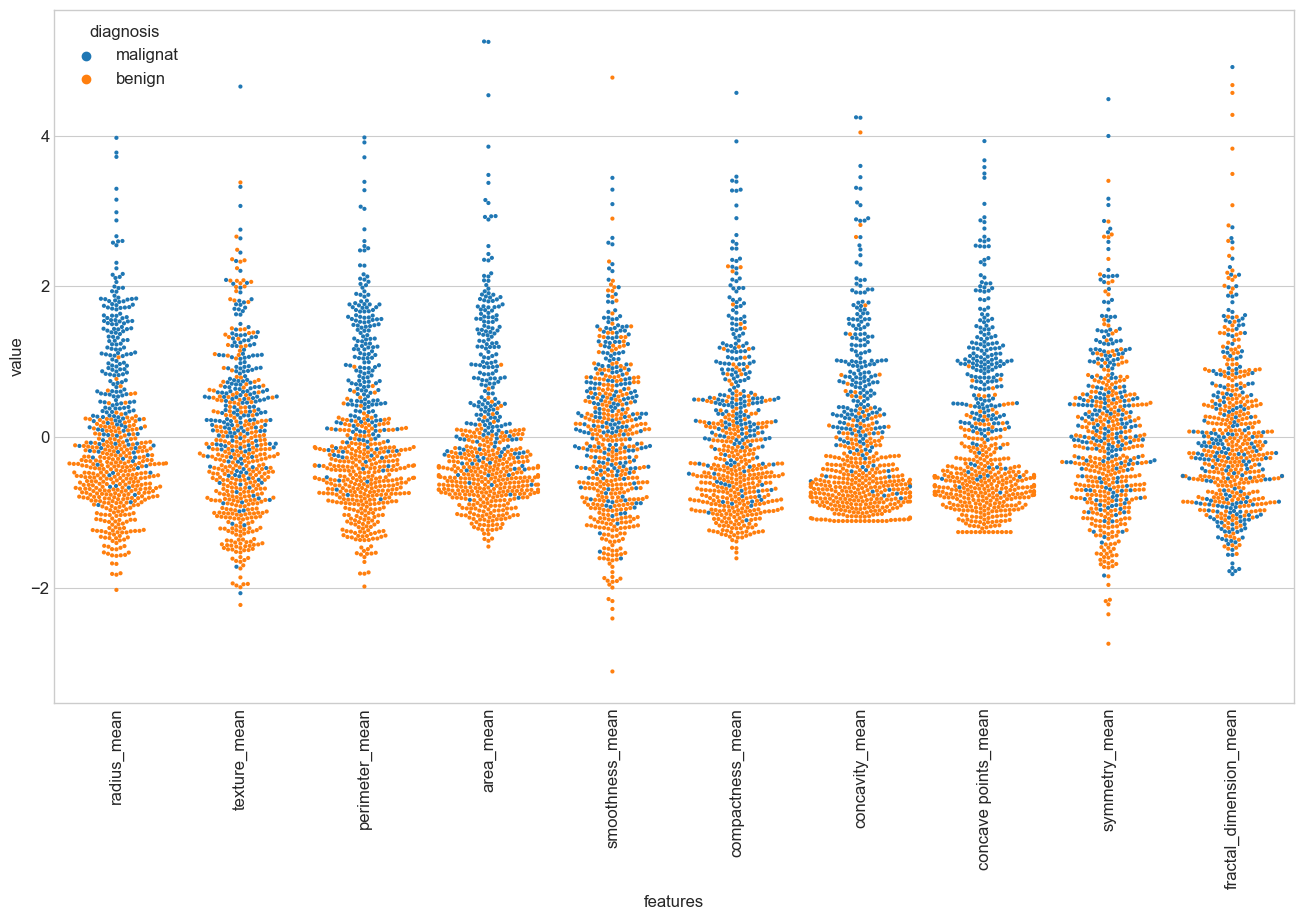

In [32]:
import time

plt.figure(figsize=(16,9))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data, size=3)

plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

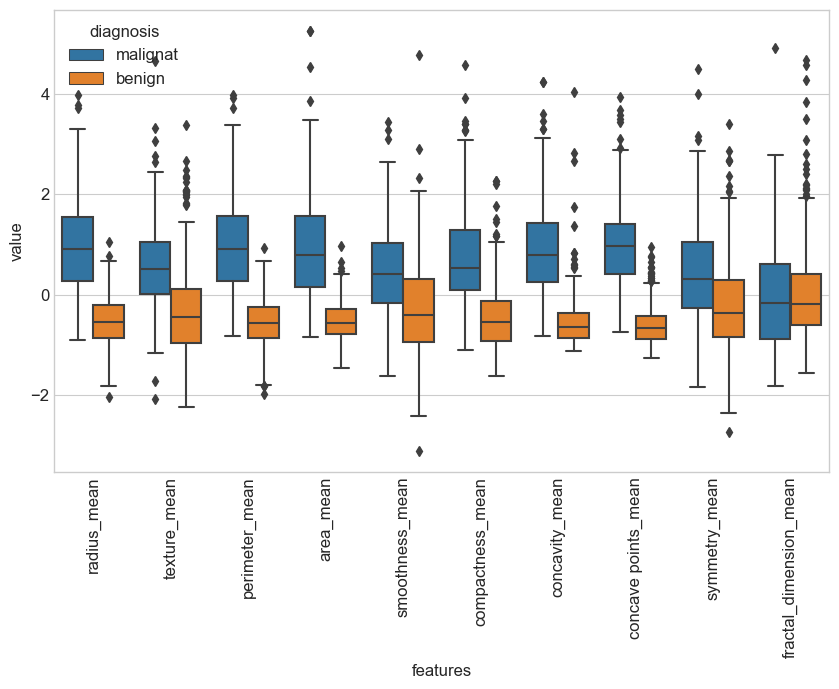

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

<Axes: >

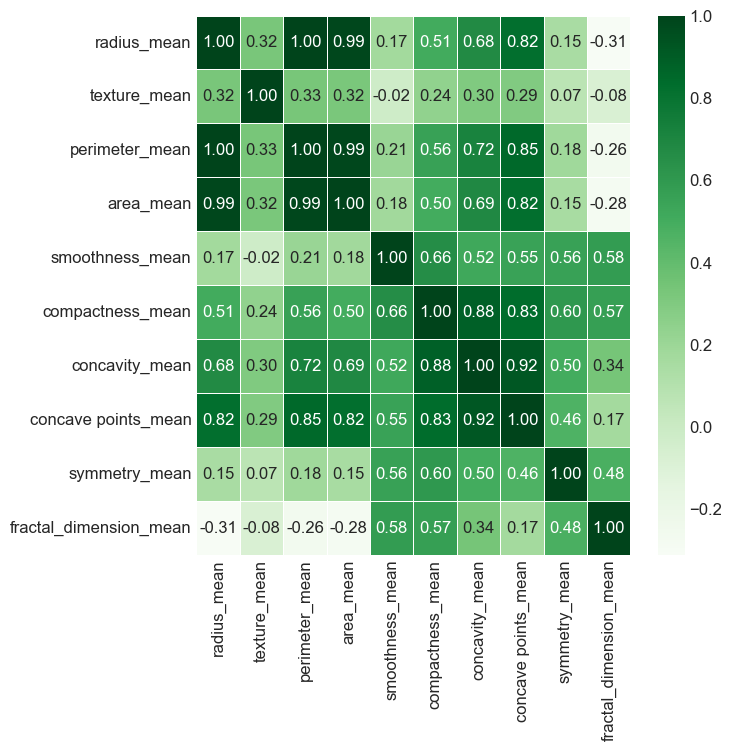

In [34]:
corr = df[numerical_cols[:10]].corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr, cmap="Greens", annot=True, fmt=".2f", linewidth=.5)

# Numerical_cols[10:20]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

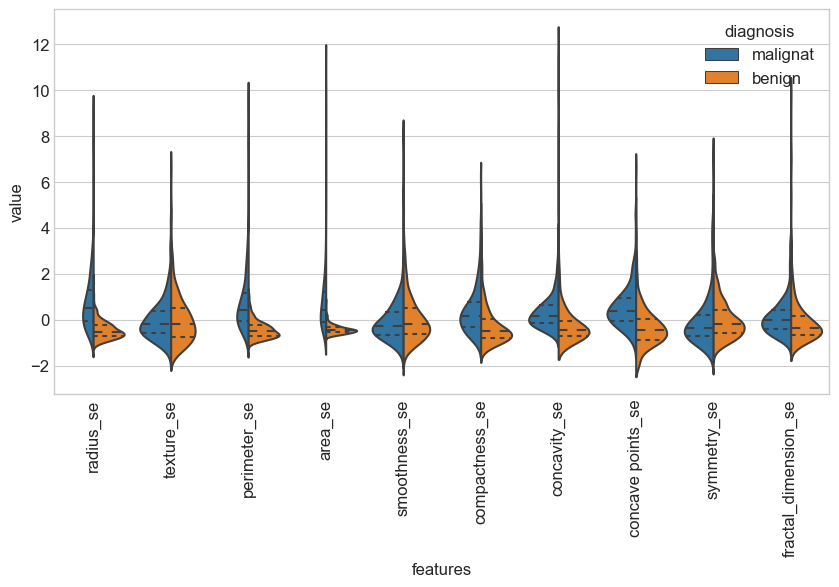

In [35]:
data = pd.concat([df['diagnosis'],df_std.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                     var_name="features",
                     value_name='value')
plt.figure(figsize=(10,5))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 14.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 15.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


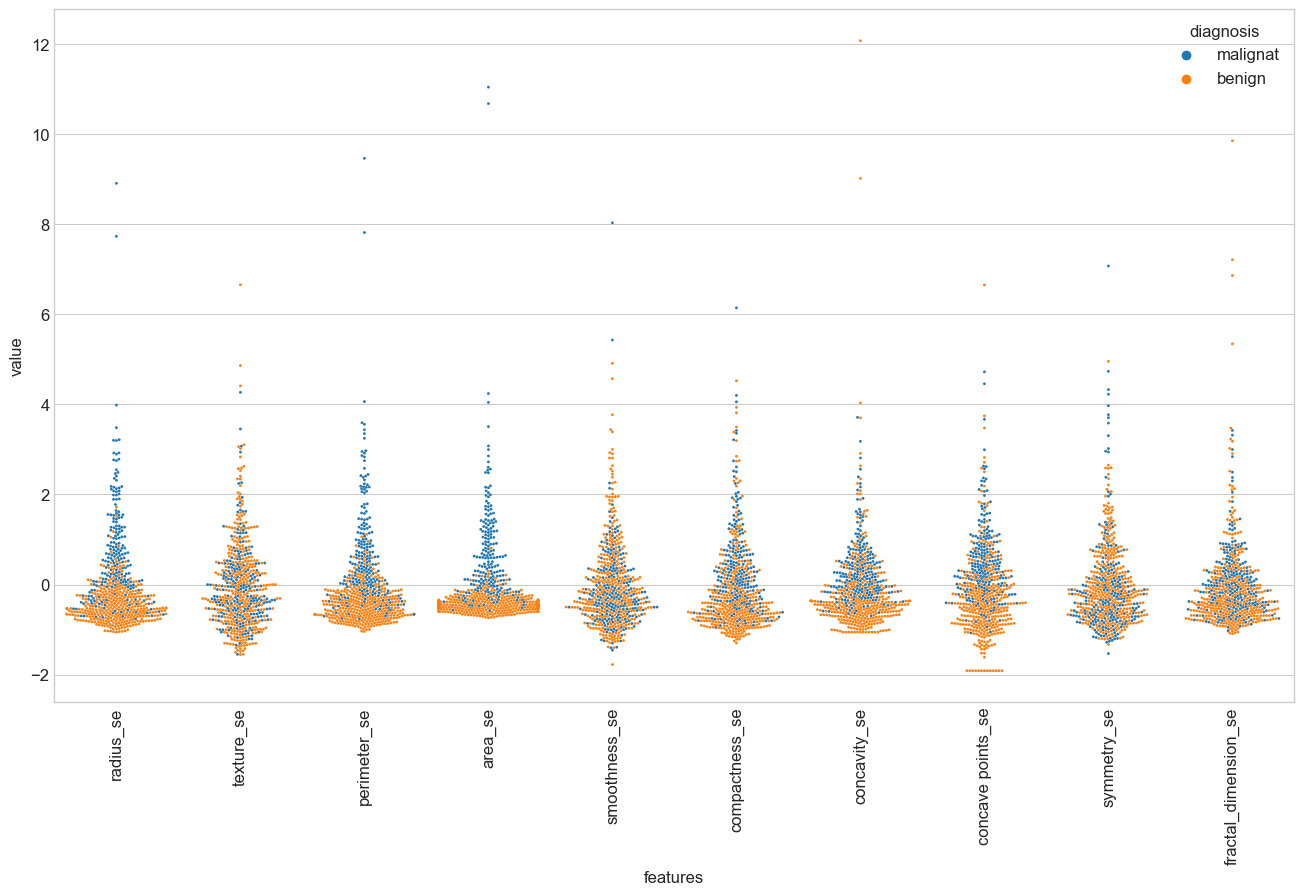

In [37]:


plt.figure(figsize=(16,9))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data, size=2)

plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

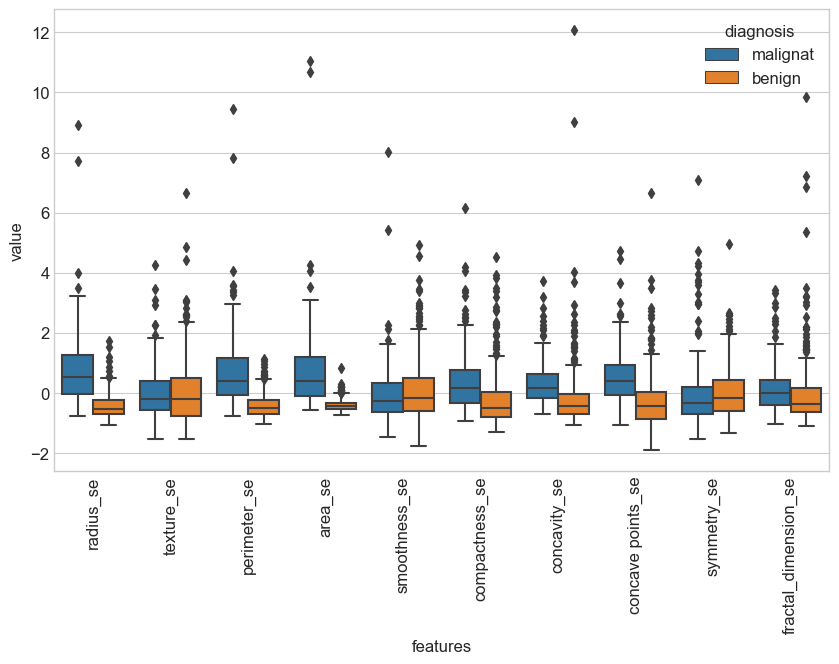

In [39]:
plt.figure(figsize=(10,6))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

<Axes: >

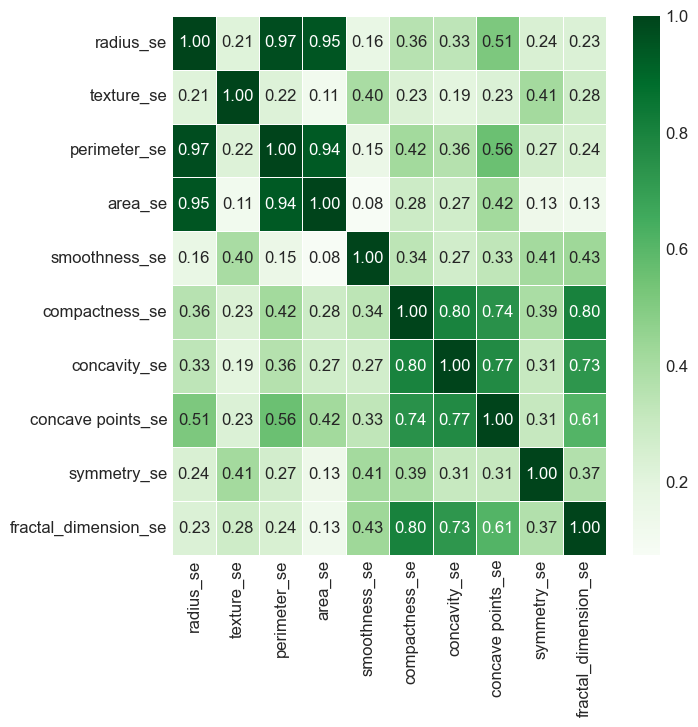

In [40]:
corr = df[numerical_cols[10:20]].corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr, cmap="Greens", annot=True, fmt=".2f", linewidth=.5)

# numerical_cols[20:30]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

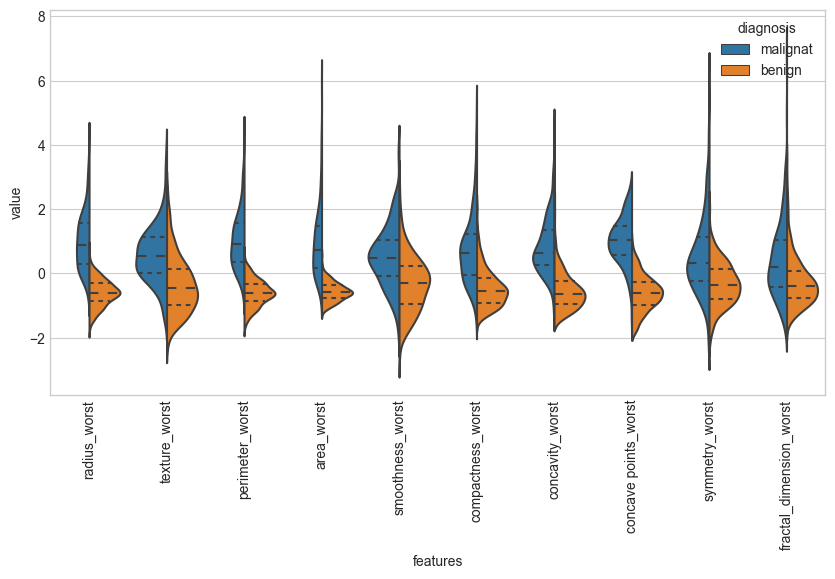

In [81]:
data = pd.concat([df['diagnosis'],df_std.iloc[:,20:30]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                     var_name="features",
                     value_name='value')
plt.figure(figsize=(10,5))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 10.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


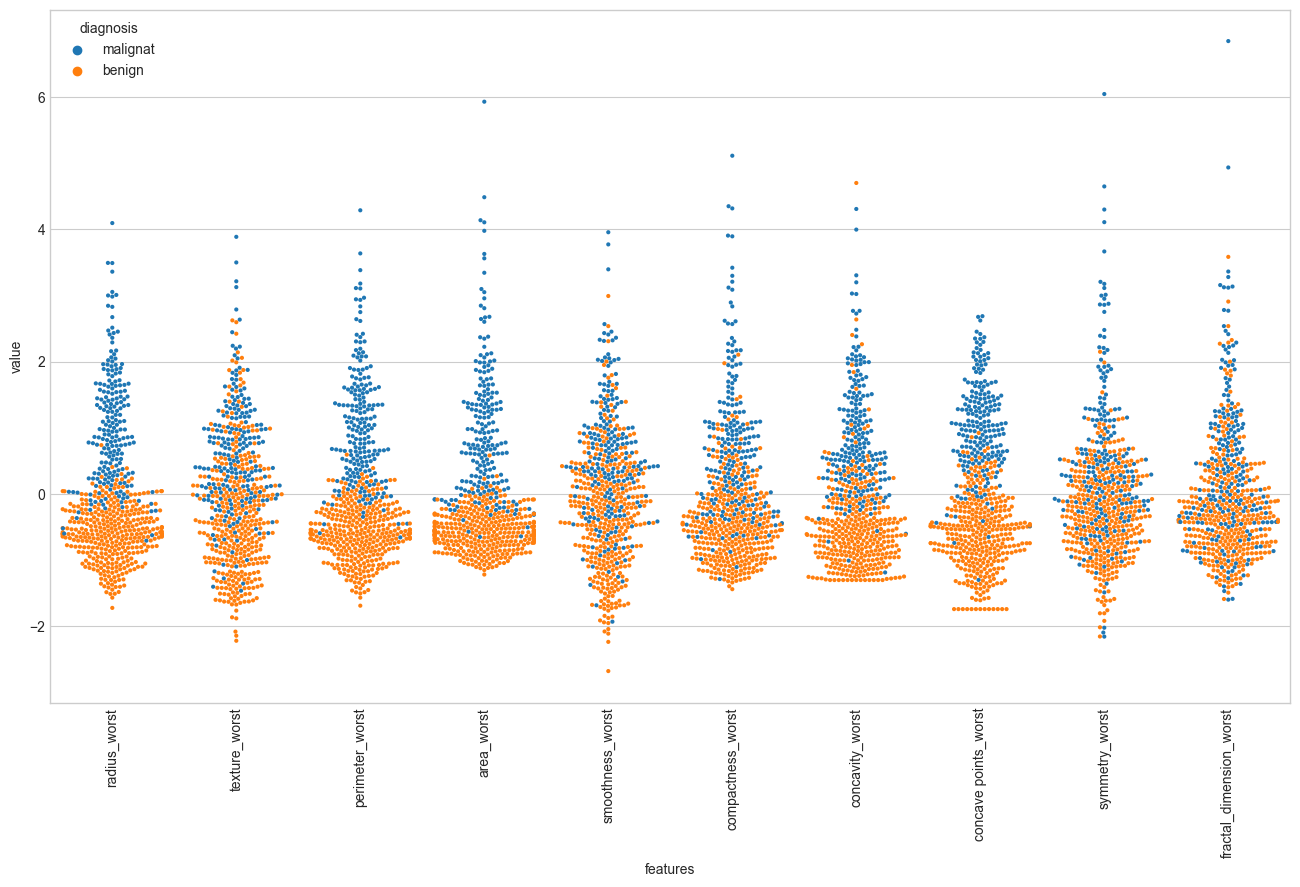

In [82]:
import time

plt.figure(figsize=(16,9))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data, size=3)

plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

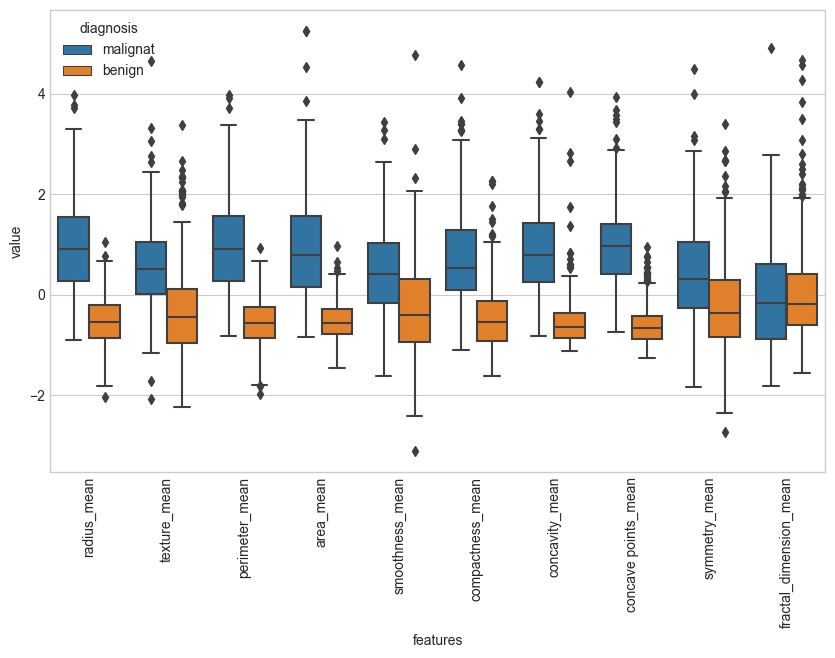

In [69]:
plt.figure(figsize=(10,6))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

<Axes: >

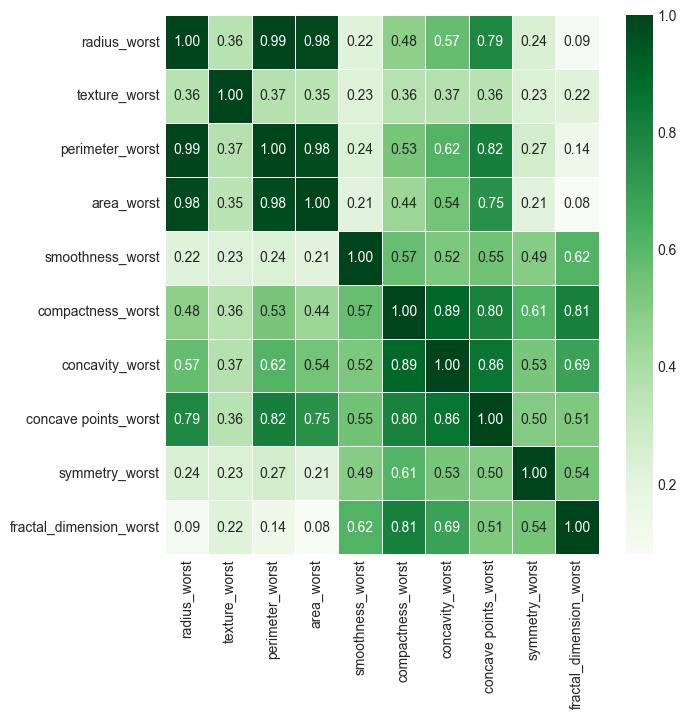

In [83]:
corr = df[numerical_cols[20:30]].corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr, cmap="Greens", annot=True, fmt=".2f", linewidth=.5)

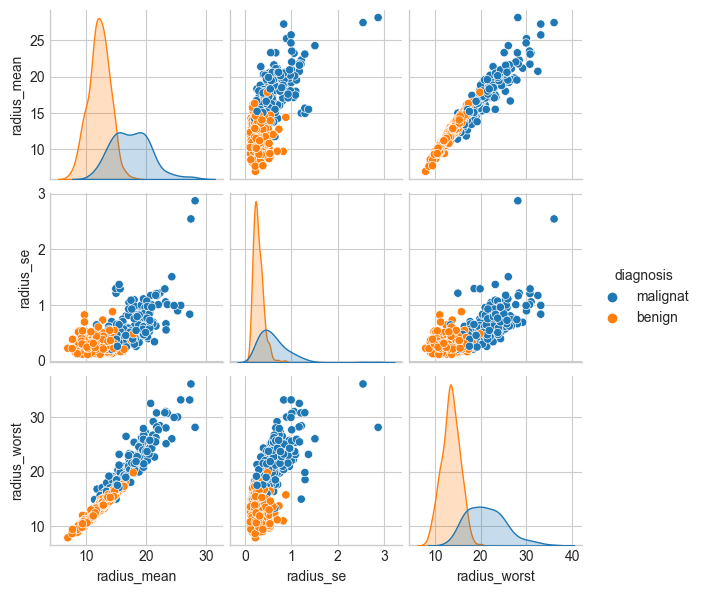

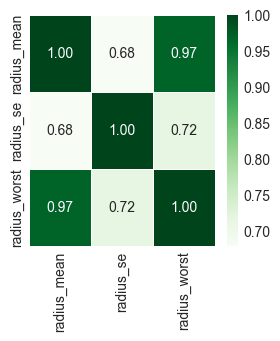

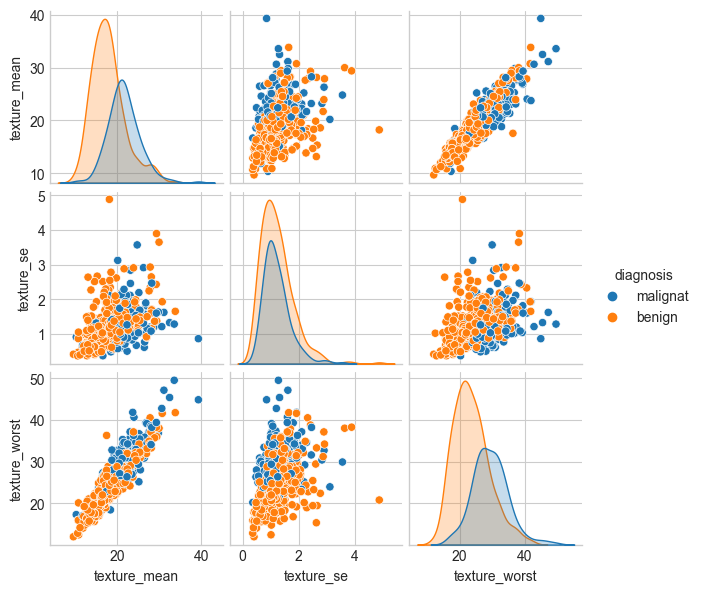

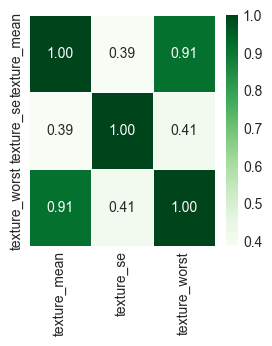

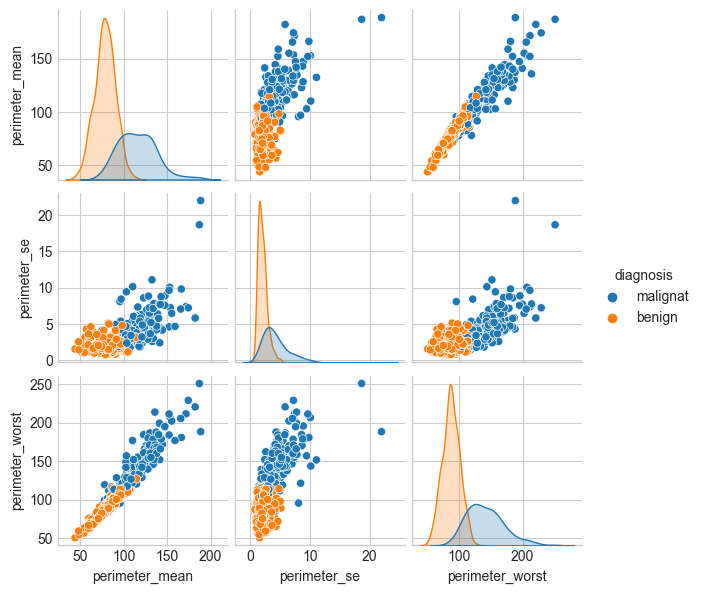

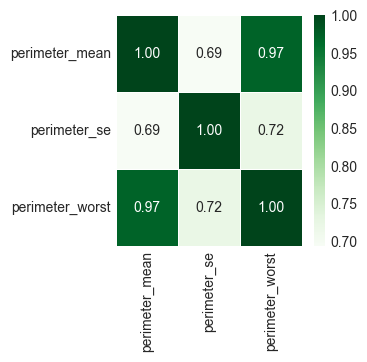

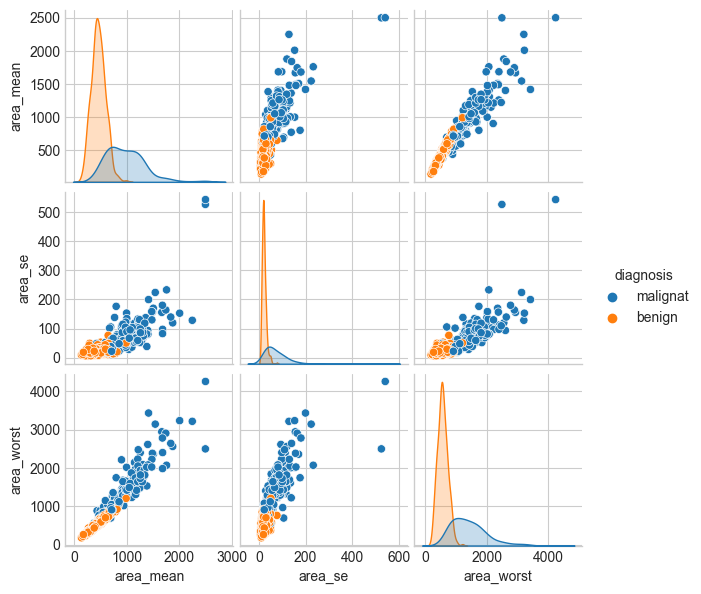

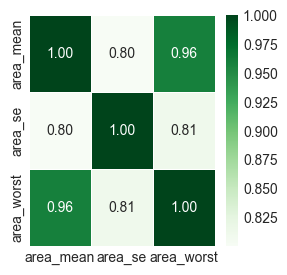

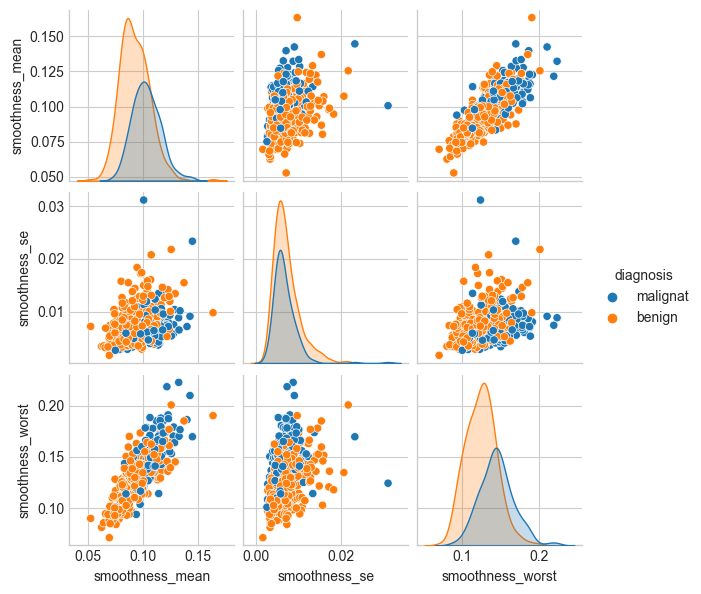

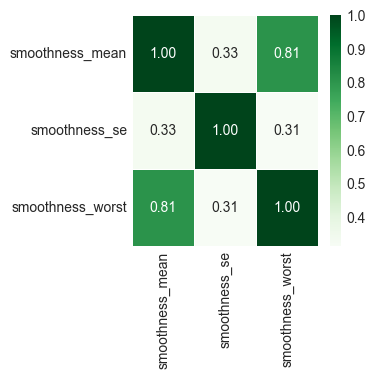

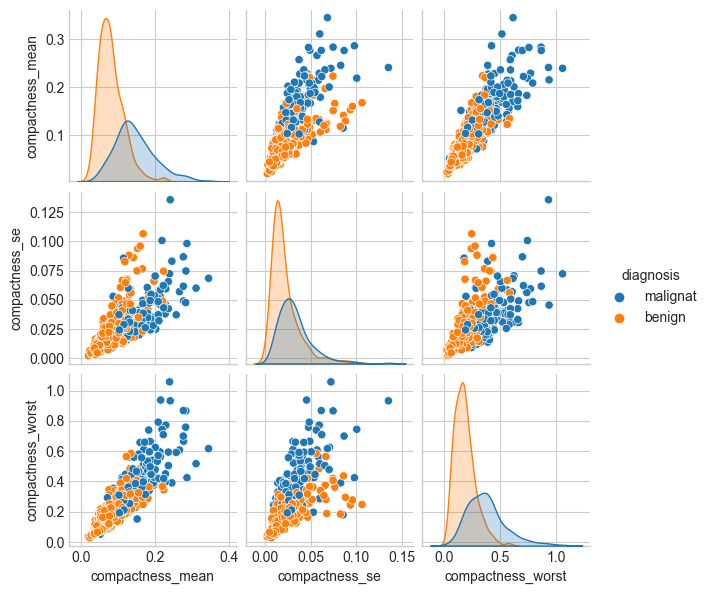

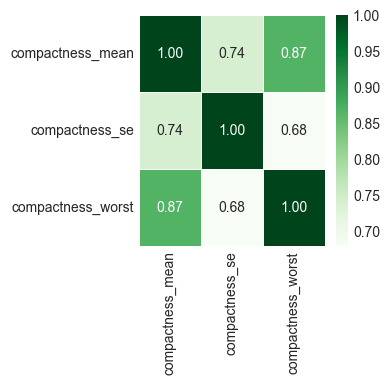

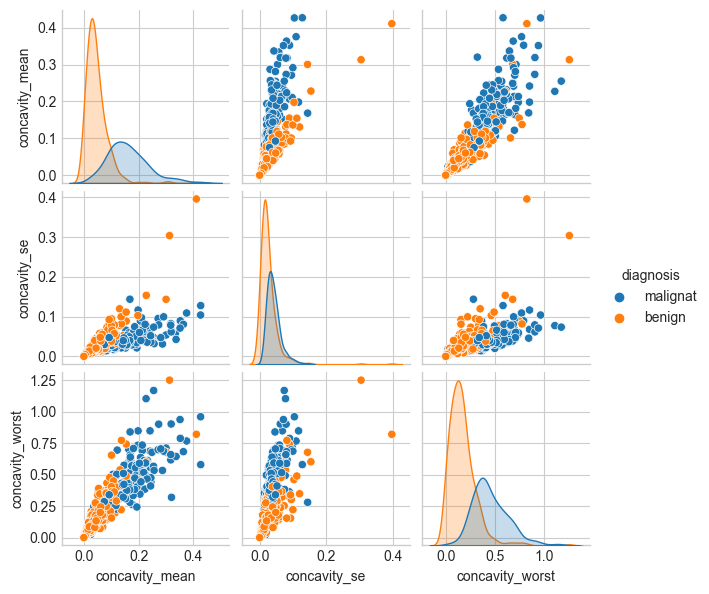

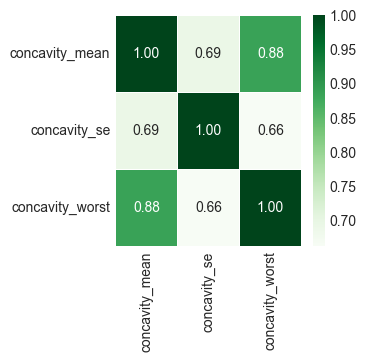

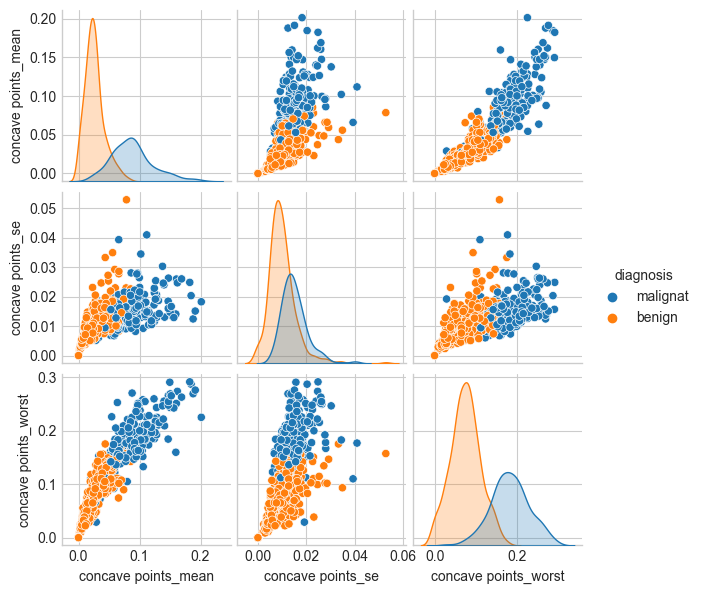

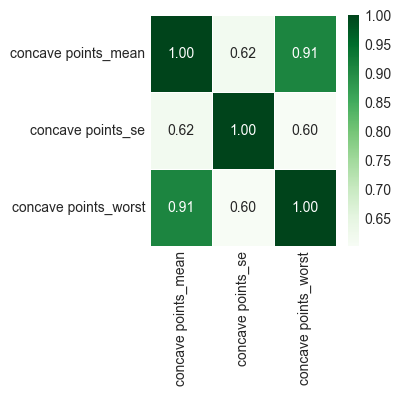

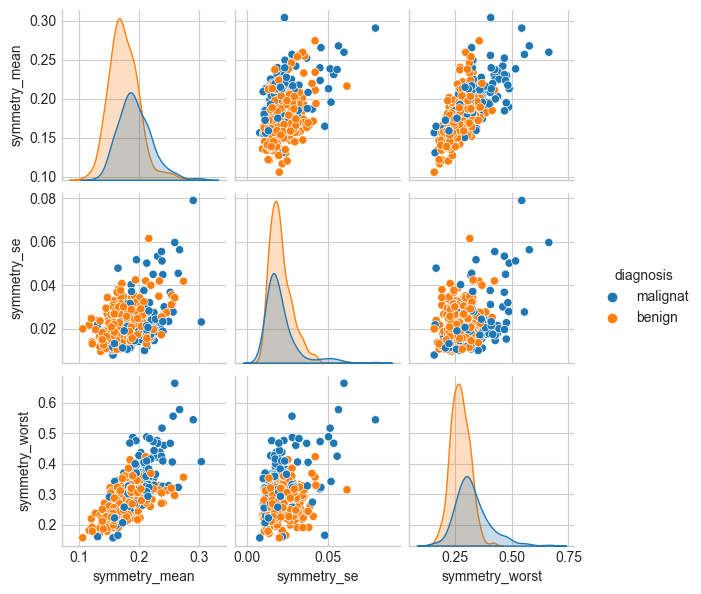

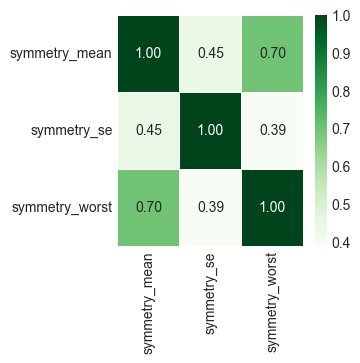

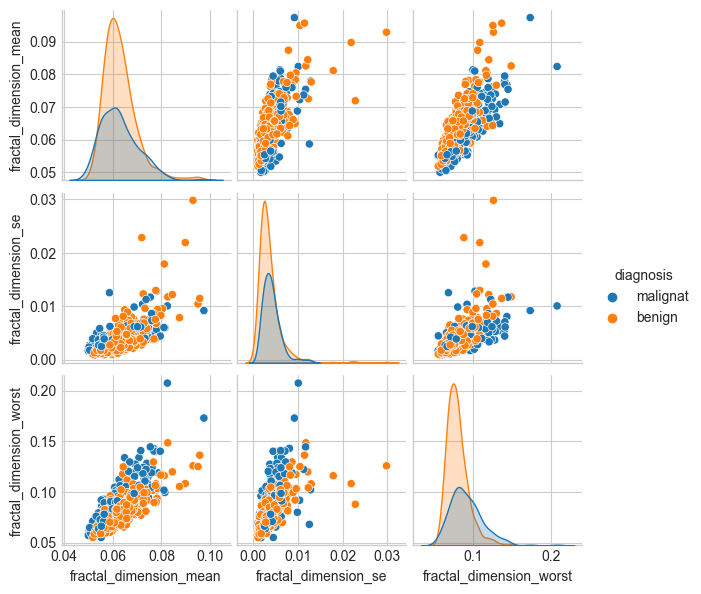

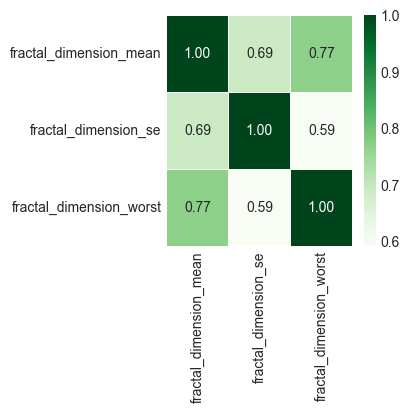

In [61]:
for n in range(0,10):
    sns.pairplot(data=df[numerical_cols[n:n+1]+numerical_cols[n+10:n+11]+numerical_cols[n+20:n+21]+['diagnosis']], diag_kind="kde", hue="diagnosis", height=2)
    plt.show()
    corr = df[numerical_cols[n:n+1]+numerical_cols[n+10:n+11]+numerical_cols[n+20:n+21]].corr()
    plt.figure(figsize=(3,3))
    sns.heatmap(corr, cmap="Greens", annot=True, fmt=".2f", linewidth=.5)

<Axes: >

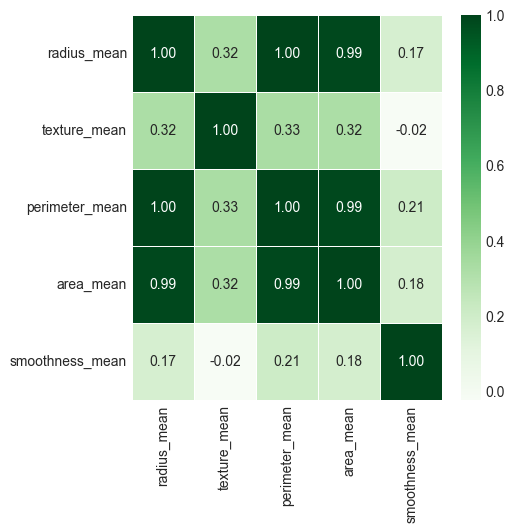

In [27]:
corr = df[numerical_cols[:5]].corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr, cmap="Greens", annot=True, fmt=".2f", linewidth=.5)

<Axes: >

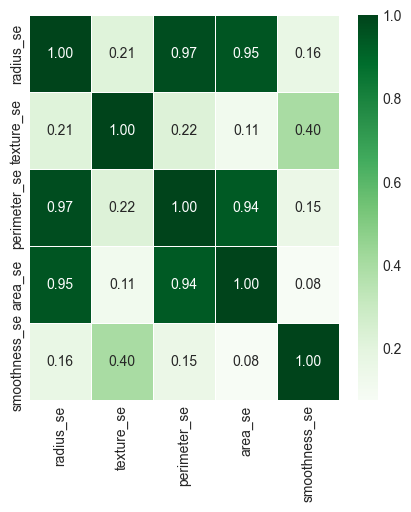

In [28]:
corr = df[numerical_cols[10:15]].corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr, cmap="Greens", annot=True, fmt=".2f", linewidth=.5)

<Axes: >

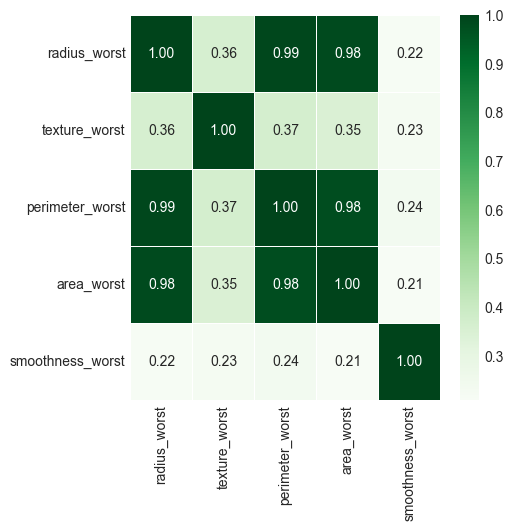

In [29]:
corr = df[numerical_cols[20:25]].corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr, cmap="Greens", annot=True, fmt=".2f", linewidth=.5)

# Create model

In [68]:
y = df['diagnosis']
y.value_counts()

benign      357
malignat    212
Name: diagnosis, dtype: int64

## Encoding target labels

In [69]:

lable_enc = LabelEncoder()
y = lable_enc.fit_transform(y)

In [70]:
y[:50]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0])

## Features selections
#### Own selection

In [71]:
X = df.drop(columns='diagnosis')

In [72]:
X.columns[[0,1,4,7,8,9,10,11,14,17,18,19]]

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')

In [73]:
X = X[['radius_mean', 'texture_mean', 'smoothness_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']]

In [74]:
#X = df.drop(columns='diagnosis')

In [75]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   radius_mean             569 non-null    float64
 1   texture_mean            569 non-null    float64
 2   smoothness_mean         569 non-null    float64
 3   concave points_mean     569 non-null    float64
 4   symmetry_mean           569 non-null    float64
 5   fractal_dimension_mean  569 non-null    float64
 6   radius_se               569 non-null    float64
 7   texture_se              569 non-null    float64
 8   smoothness_se           569 non-null    float64
 9   concave points_se       569 non-null    float64
 10  symmetry_se             569 non-null    float64
 11  fractal_dimension_se    569 non-null    float64
dtypes: float64(12)
memory usage: 53.5 KB


In [76]:
#Splitt the data into training and testing sets.
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [77]:
X_train.sample(5)

radius_mean  texture_mean  smoothness_mean  concave points_mean  \
442        13.78         15.79          0.08817             0.009937   
431        12.40         17.68          0.10540             0.027990   
24         16.65         21.38          0.11210             0.091700   
549        10.82         24.21          0.08192             0.008160   
443        10.57         18.32          0.08142             0.011110   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
442         0.1405                 0.05848     0.3563      0.4833   
431         0.1811                 0.07102     0.1767      1.4600   
24          0.1995                 0.06330     0.8068      0.9017   
549         0.1976                 0.06328     0.5196      1.9180   
443         0.2372                 0.05768     0.1818      2.5420   

     smoothness_se  concave points_se  symmetry_se  fractal_dimension_se  
442       0.006432           0.005657      0.01227              0.002564  
431       0.010000           0.011670      0.02187              0.006005  
24        0.006048           0.011300      0.01468              0.002801  
549       0.008263           0.005917      0.02466              0.002977  
443       0.010720           0.011110      0.01717              0.004492

# Preprocessing

In [84]:
categorical_cols = [cname for cname in X_train if  X_train[cname].dtype == "object"]
print(categorical_cols) 

[]


In [85]:
# Select numerical columns
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int8', 'int32', 'int64', 'float64']]
print(numerical_cols)

['radius_mean', 'texture_mean', 'smoothness_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']


In [86]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [87]:
categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value="missing")),  #('imputer', SimpleImputer(strategy='most_frequent')),       
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ])

In [88]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer_num', SimpleImputer(strategy = 'mean')), # ('imputer_num', SimpleImputer(strategy = 'median')) / ('imputer_num', SimpleImputer(strategy = 'constant')),
    ('std_scaler', StandardScaler()) #('normalizer', Normalizer())
    
    ])

In [89]:
# Bundle preprocessing for numerical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression(random_state = 0, solver='lbfgs', multi_class="auto")

In [91]:
pipeline_log_reg = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', log_reg_model)])

In [92]:
pipeline_log_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['radius_mean',
                                                   'texture_mean',
                                                   'smoothness_mean',
                                                   'concave points_mean',
                                                   'symmetry_mean',
                                                   'fractal_dimension_mean',
                                                   'radius_se', 'texture_se',
                                                   'smoothness_se',
                                                   'concave points_se',
                                                   'symmetry_se',
                                                   'fractal_dimension_se']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('model', LogisticRegression(random_state=0))])

In [93]:
#predykcja etykiet obiektów ze zbioru testowego
preds = pipeline_log_reg.predict(X_valid)

In [95]:
#wyświetlenie macierzy pomyłek
print('macierz pomyłek:\n', confusion_matrix(y_valid, preds))

macierz pomyłek:
 [[62  5]
 [ 4 43]]


#For all features 
 [[65  2]
 [ 2 45]]

In [ ]:
# Confusion matrix shows that my choice of features is worse than taking all, so i will use sklearn features selections method :) 

In [98]:
#Metrics
accuracy = accuracy_score(y_valid, preds)
recall = recall_score(y_valid, preds, average = 'weighted')
precision = precision_score(y_valid, preds, average = 'weighted')
auc_roc = roc_auc_score(y_valid, pipeline_log_reg.predict_proba(X_valid)[:, 1])
f1 = f1_score(y_valid, preds, average = 'weighted')
print(
' AUC ROC = ', auc_roc,
'\n Accuracy = ', accuracy,
'\n Recall = ', recall,
'\n Precision = ', precision,
'\n F1_score = ', f1)

 AUC ROC =  0.9739599872975547 
 Accuracy =  0.9210526315789473 
 Recall =  0.9210526315789473 
 Precision =  0.9214347421584265 
 F1_score =  0.921171349426197


In [99]:
print(classification_report(y_valid, preds))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93        67
           1       0.90      0.91      0.91        47

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



#For all features 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

In [101]:
def plot_conf_matrix(estimator, x, y, labels = None, normalize = None):
    font_size = plt.rcParams["font.size"]
    plt.rcParams.update({'font.size':20})
    
    if normalize:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
        titles_options = [
                ("Confusion matrix, without normalization", None),
                ("Normalized confusion matrix", "true"),
            ]
        j = 0
        for title, normalize in titles_options:
            disp = ConfusionMatrixDisplay.from_estimator(
                    estimator,
                    x,
                    y,
                    display_labels=labels,
                    cmap=plt.cm.Blues,
                    normalize=normalize,
                    ax=axes[j]
                )
            disp.ax_.set_title(title)
            #disp.ax_.tick_params(axis='both', labelsize=20)

            #disp.ax_.set_xticklabels(disp.ax_.get_xticklabels(), size=20)  
            #disp.ax_.set_yticklabels(disp.ax_.get_yticklabels(), size=20)  
            j = j+1        
    else:
        title = "Confusion matrix"
        disp = ConfusionMatrixDisplay.from_estimator(
                    estimator,
                    x,
                    y,
                    display_labels=labels,
                    cmap=plt.cm.Blues,
                    normalize=normalize
                )
        disp.ax_.set_title(title)
        #disp.ax_.tick_params(axis='both', labelsize=20)

        #disp.ax_.set_xticklabels(disp.ax_.get_xticklabels(), size=20)  
        #disp.ax_.set_yticklabels(disp.ax_.get_yticklabels(), size=20)  
    plt.show()
    plt.rcParams.update({'font.size': font_size})

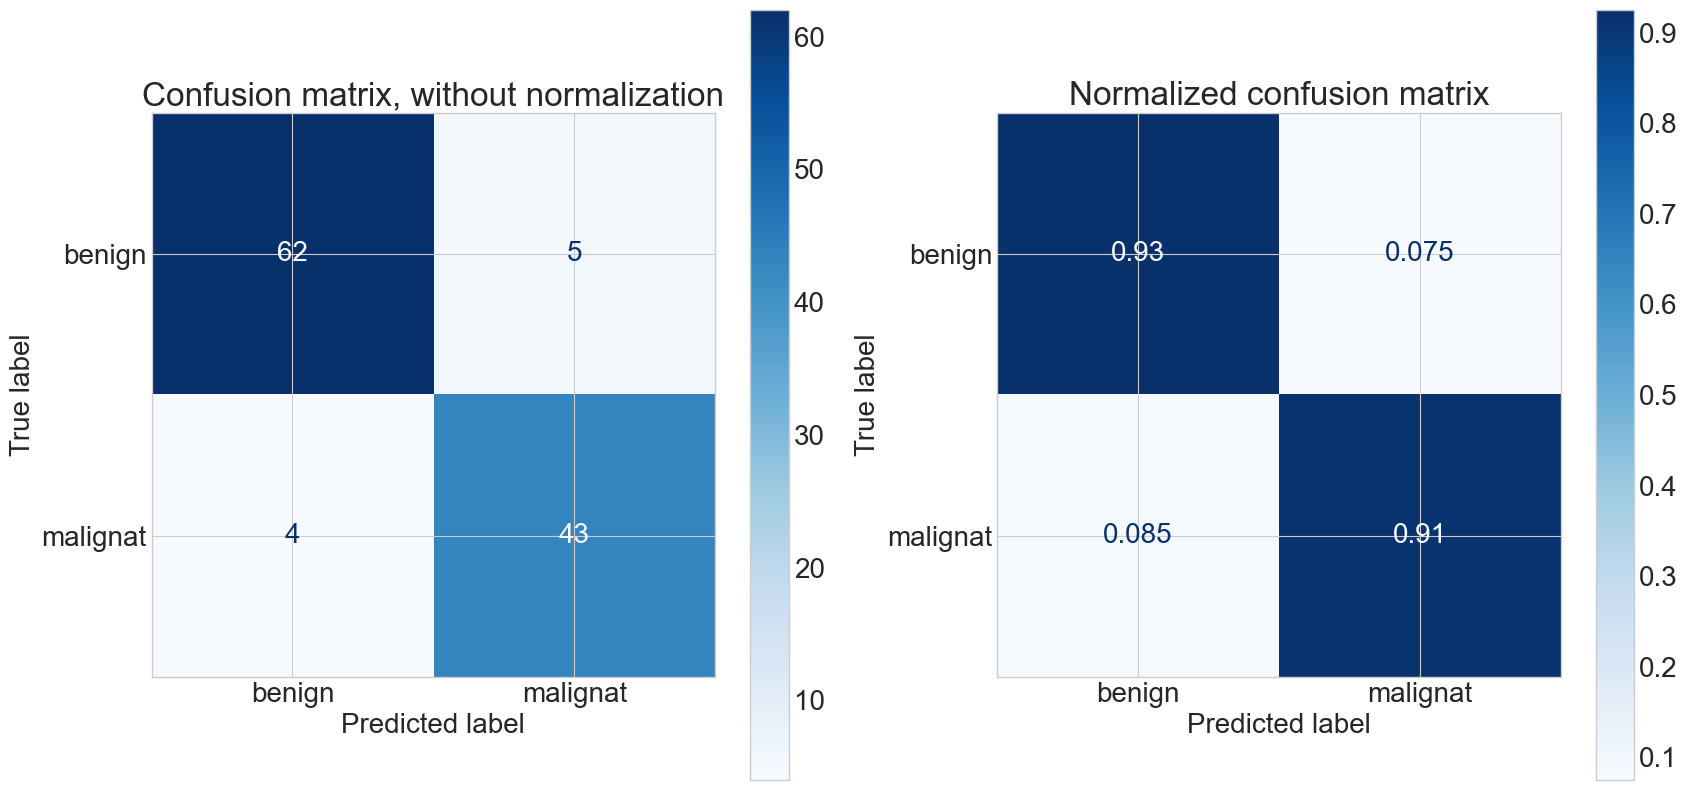

In [102]:
plot_conf_matrix(estimator = pipeline_log_reg, x= X_valid, y= y_valid, labels = lable_enc.classes_, normalize = True)

# Automatic Features selection with pipeline

In [103]:

# from sklearn.svm import LinearSVC
# feature_selector = Pipeline([
#     ('feature_selection', SelectFromModel(LinearSVC(dual="auto", penalty="l1")))
#     ])

In [104]:
X = df.drop(columns='diagnosis')
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [105]:
# Select numerical columns
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int8', 'int32', 'int64', 'float64']]
# Select categorical columns
categorical_cols = [cname for cname in X_train if  X_train[cname].dtype == "object"]

In [205]:
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# feature_selector = SFS(
#     LogisticRegression(),
#     forward=False,
#     #direction= "backward",  # "backward" / "forward", 
#     scoring='accuracy', #"roc_auc" /"recall"/"precision"/'f1'/'neg_log_loss'
#     cv=5,
#     n_jobs=-1)  

In [251]:
#TOO Long
# from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
# feature_selector = EFS(
#     LogisticRegression(),
#     min_features = 19,
#     max_features = 20,
#     #direction= "backward",  # "backward" / "forward", 
#     scoring="recall",  #"roc_auc" /"recall"/"precision"/'f1'/'neg_log_loss'
#     cv=5,
#     n_jobs=-1,
#     print_progress=True)

In [284]:
feature_selector = SequentialFeatureSelector(
    LogisticRegression(),
    n_features_to_select="auto",
    direction= "backward",  # "backward" / "forward", 
    scoring="recall",  #"roc_auc" /"recall"/"precision"/'f1'/'neg_log_loss'
    cv=5,
    n_jobs=-1)

In [285]:
#Use SrquentialFeatureSelector separetly
#feature_selector.fit(X, y)
#feature_selector.get_support()
#feature_selector.get_feature_names_out()

In [286]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [287]:
from sklearn.pipeline import make_pipeline
#f_s_pipeline = make_pipeline(StandardScaler(), feature_selector, LogisticRegression())
f_s_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('selector', feature_selector),
                               ('model', log_reg_model)])

f_s_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['radius_mean',
                                                   'texture_mean',
                                                   'perimeter_mean',
                                                   'area_mean',
                                                   'smoothness_mean',
                                                   'compactness_mean',
                                                   'concavity_mean',
                                                   'concave points_mean',
                                                   'symmetry_mean',
                                                   'fractal_dimension_mean',
                                                   'radius_se', 'texture_s...
                                                   'fractal_dimension_worst']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('selector',
                 SequentialFeatureSelector(direction='backward',
                                           estimator=LogisticRegression(),
                                           n_features_to_select='auto',
                                           n_jobs=-1, scoring='recall')),
                ('model', LogisticRegression(random_state=0))])

In [288]:
print(f_s_pipeline[1])

SequentialFeatureSelector(direction='backward', estimator=LogisticRegression(),
                          n_features_to_select='auto', n_jobs=-1,
                          scoring='recall')


In [289]:
# print(f_s_pipeline.named_steps[NAME OF PIPELINE STEP IN DEFINITION OF PIPELINE])

In [290]:
# https://medium.com/ai-made-simple/pipelines-in-scikit-learn-46c61c5c60b2

In [291]:
f_s_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['radius_mean',
                                                   'texture_mean',
                                                   'perimeter_mean',
                                                   'area_mean',
                                                   'smoothness_mean',
                                                   'compactness_mean',
                                                   'concavity_mean',
                                                   'concave points_mean',
                                                   'symmetry_mean',
                                                   'fractal_dimension_mean',
                                                   'radius_se', 'texture_s...
                                                   'fractal_dimension_worst']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('selector',
                 SequentialFeatureSelector(direction='backward',
                                           estimator=LogisticRegression(),
                                           n_features_to_select='auto',
                                           n_jobs=-1, scoring='recall')),
                ('model', LogisticRegression(random_state=0))])

In [292]:
#Predict
preds = f_s_pipeline.predict(X_valid)

In [293]:
print('Confusion matrix:\n', confusion_matrix(y_valid, preds))

Confusion matrix:
 [[66  1]
 [ 2 45]]


In [216]:
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
Confusion matrix:
 [[63  4]
 [ 7 40]]
# scoring="recall"
macierz pomyłek:
 [[66  1]
 [ 2 45]]
# scoring="roc_auc"  
macierz pomyłek:
 [[66  1]
 [ 3 44]]

SyntaxError: invalid syntax (2172397337.py, line 2)

In [240]:
#obliczenie metryk sukcesu
auc_roc = roc_auc_score(y_valid, f_s_pipeline.predict_proba(X_valid)[:, 1])
accuracy = accuracy_score(y_valid, preds)
recall = recall_score(y_valid, preds, average = 'weighted')
precision = precision_score(y_valid, preds, average = 'weighted')
f1 = f1_score(y_valid, preds, average = 'weighted')
print(' AUC ROC = ', auc_roc,
'\n Accuracy = ', accuracy,
'\n Recall = ', recall,
'\n Precision = ', precision,
'\n F1_score = ', f1)

 AUC ROC =  0.9961892664337885 
 Accuracy =  0.9736842105263158 
 Recall =  0.9736842105263158 
 Precision =  0.9737515143357114 
 F1_score =  0.9736401936741494


In [228]:
#raport dotyczący wyników klasyfikacji: precyzja, czułość, f1 uzyskane dla 
#poszczególnych klas oraz ich liczebność wartości podane z dokładnością 
#do dwóch miejsc po przecinku
print(classification_report(y_valid, preds))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



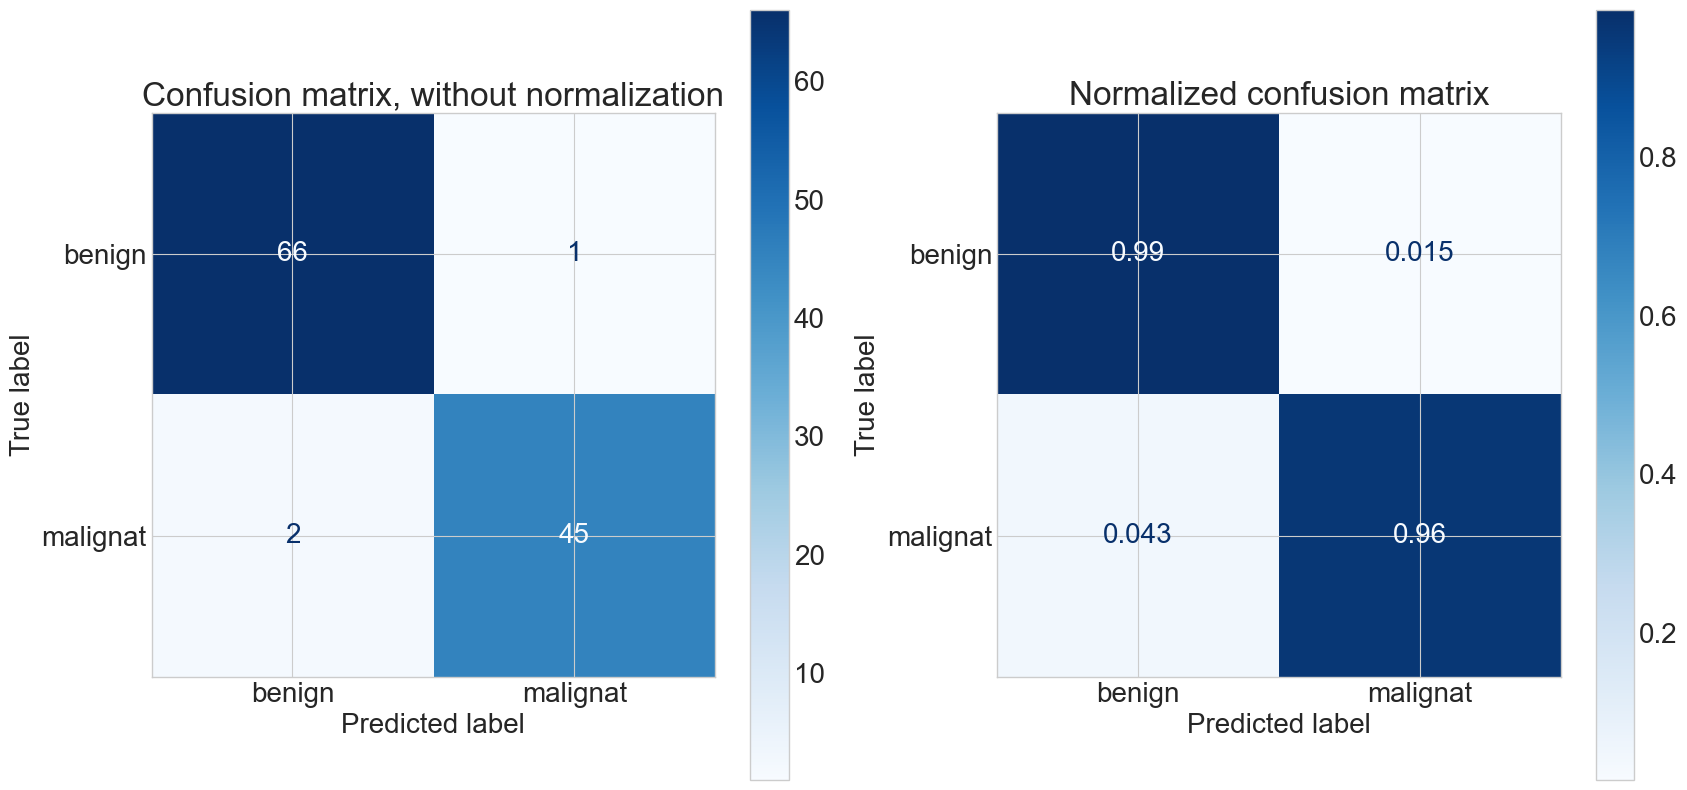

In [270]:
plot_conf_matrix(estimator = f_s_pipeline, x= X_valid, y= y_valid, labels = lable_enc.classes_, normalize = True)

In [273]:
print(f_s_pipeline.named_steps['selector'].get_params())

{'cv': 5, 'direction': 'backward', 'estimator__C': 1.0, 'estimator__class_weight': None, 'estimator__dual': False, 'estimator__fit_intercept': True, 'estimator__intercept_scaling': 1, 'estimator__l1_ratio': None, 'estimator__max_iter': 100, 'estimator__multi_class': 'auto', 'estimator__n_jobs': None, 'estimator__penalty': 'l2', 'estimator__random_state': None, 'estimator__solver': 'lbfgs', 'estimator__tol': 0.0001, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': LogisticRegression(), 'n_features_to_select': 'auto', 'n_jobs': None, 'scoring': 'recall', 'tol': None}


In [283]:
feature_names = np.array(X_train.columns)
#Selected columns
#f_s_pipeline.named_steps['selector'].get_support()
feature_names[f_s_pipeline.named_steps['selector'].get_support()]

array(['concavity_mean', 'radius_se', 'texture_se', 'concavity_se',
       'concave points_se', 'fractal_dimension_se', 'radius_worst',
       'texture_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'], dtype=object)

### Check difrent  method  for Sequentional Feature Selection

# Grid Search with Sequentional Feature Selection
## Now make hyperparameter tuning